# Setup

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Carregando os Dados

In [3]:
url = 'https://tinyurl.com/spothits'
df = pd.read_csv(url)
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [4]:
df.value_counts()

track_id                track_name                                             track_artist      track_popularity  track_album_id          track_album_name                                       track_album_release_date  playlist_name    playlist_id             playlist_genre  playlist_subgenre          danceability  energy  key  loudness  mode  speechiness  acousticness  instrumentalness  liveness  valence  tempo    duration_ms
6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxury Remix  Ed Sheeran        66                2oCs0DGTsRO98Gh5ZSl2Cx  I Don't Care (with Justin Bieber) [Loud Luxury Remix]  2019-06-14                Pop Remix        37i9dQZF1DXcZDD7cfEKhW  pop             dance pop                  0.748         0.916   6    -2.634    1     0.0583       0.102000      0.000000          0.0653    0.5180   122.036  194754         1
0r7CVbZTWZgbTCYdfa2P31  Memories - Dillon Francis Remix                        Maroon 5          67                63rPSO264uRjW1X5

## Apagando Dados Faltantes

Vamos eliminar todas as linhas que possuem alguma coluna com dados faltantes.

Isso não vai alterar a nossa análise porque o número de linhas com dados faltantes é muito pequeno em relação à quantidade de dados total.

In [5]:
df.dropna(inplace=True)

O ``inplace=True`` serve para substituir o próprio dataframe pelo novo dataframe com a atualização. Se quiséssemos manter o datframe antigo poderiamos criar uma nova variavel ``df_notnull = df.dropna()`` e aí teríamos um df com a atualização preservando o df antigo.

In [6]:
df.isnull().sum()

track_id                    0
track_name                  0
track_artist                0
track_popularity            0
track_album_id              0
track_album_name            0
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

## Removendo Dados Duplicados

In [7]:
df_limpo = df.drop_duplicates(['track_name'])

Removemos as duplicatas pela coluna ``track_name``, isto é, estamos considerando dados duplicados todos as linhas que tiverem o mesmo valor da coluna ``track_name``. 

- Se passarmos mais de uma coluna, o pandas vai verificar se os valores de todas as colunas passadas são iguais para considerar uma duplicata. 

- Se não passamos nada (``df.drop_duplicates()``), o pandas ia olhar para **TODAS** as colunas e só consideraria duplicata as linhas que tivessem os valores de todas as colunas repetidos.

In [8]:
print(df.size)
print(df_limpo.size)

755044
539327


### Visualizando num Histograma

<Axes: >

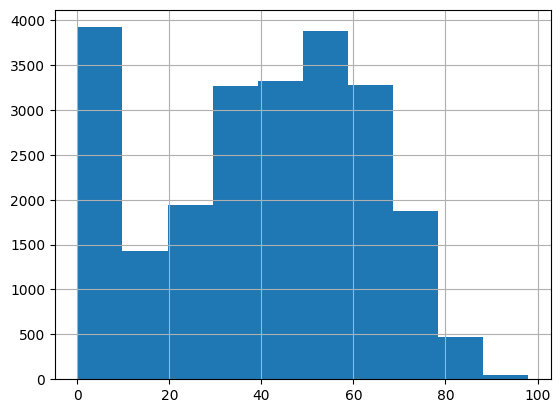

In [9]:
df_limpo.track_popularity.hist()

<Axes: xlabel='track_popularity', ylabel='Count'>

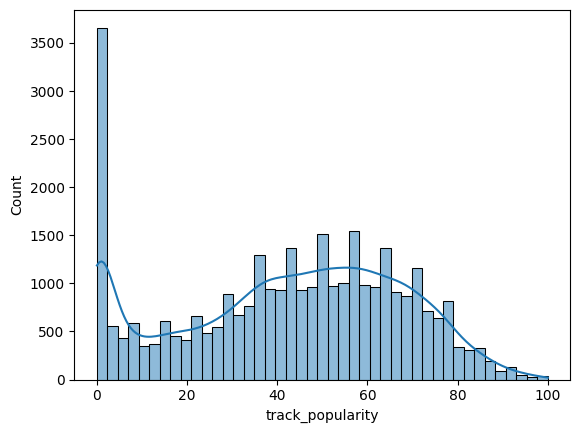

In [10]:
sns.histplot(df['track_popularity'], kde=True)

O parâmetro ``kde=True`` no Seaborn (usado em histplot ou displot) ativa a curva de Kernel Density Estimation (Estimativa de Densidade Kernel), uma linha suavizada que representa a distribuição de probabilidade dos dados. Ele é ideal para visualizar formas contínuas de distribuições em vez de barras discretas

In [11]:
# Vendo os nomes das colunas
df_limpo.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='str')

## Quais são os gêneros musicais?

In [12]:
df_limpo.playlist_genre.value_counts()

playlist_genre
rap      4877
pop      4572
edm      3817
latin    3417
r&b      3400
rock     3366
Name: count, dtype: int64

### Visualizando Distribuição de Gêneros Musicais

Text(0.5, 1.0, 'Distribuição dos Gêneros de Playlists')

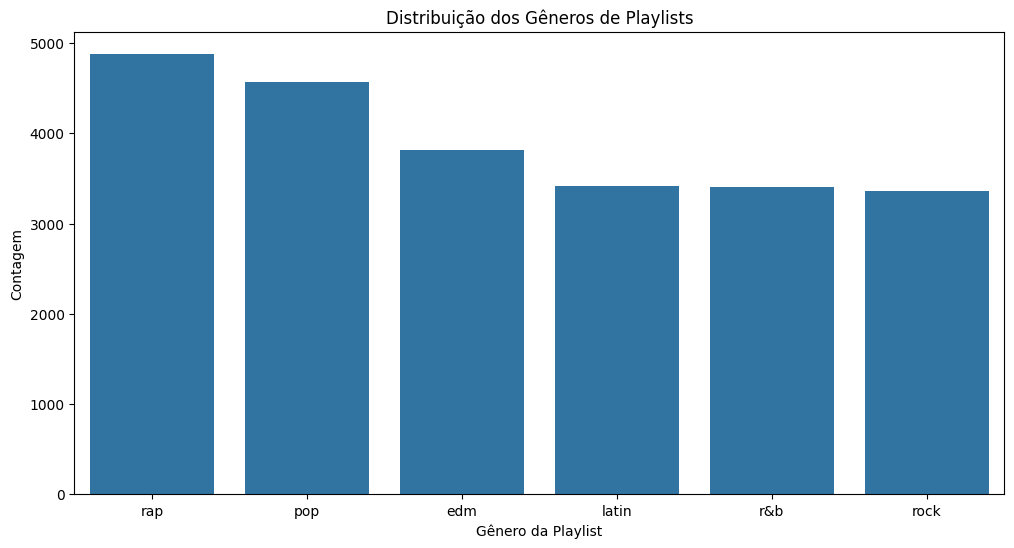

In [13]:
contagem = df_limpo['playlist_genre'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=contagem.index, y=contagem.values)
plt.xlabel('Gênero da Playlist')
plt.ylabel('Contagem')
plt.title('Distribuição dos Gêneros de Playlists')

C:\Users\ayron\AppData\Local\Temp\ipykernel_41760\2309233782.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=contagem.index, y=contagem.values, palette='viridis')


Text(0.5, 1.0, 'Distribuição dos Gêneros de Playlists')

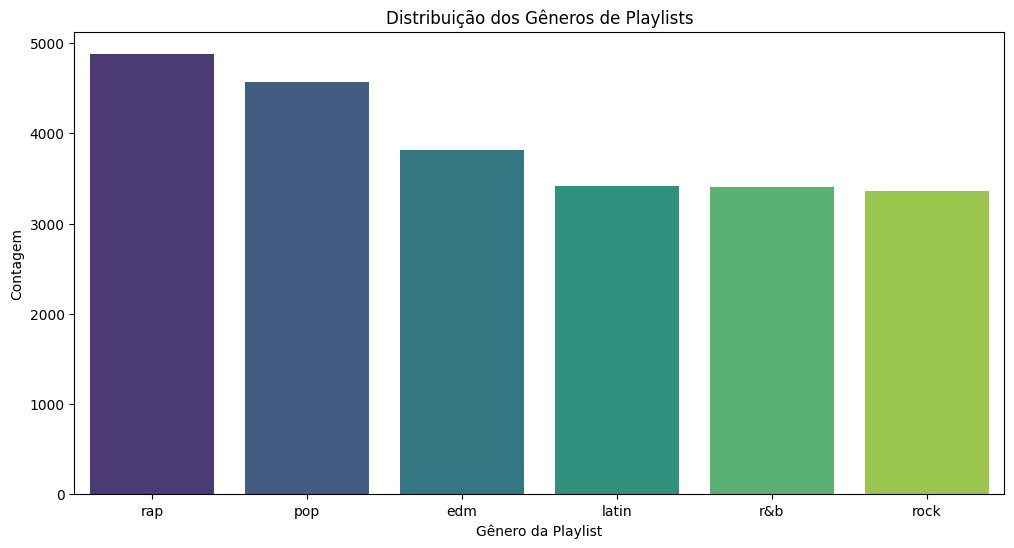

In [14]:
# Trocando as cores

contagem = df_limpo['playlist_genre'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=contagem.index, y=contagem.values, palette='viridis')
plt.xlabel('Gênero da Playlist')
plt.ylabel('Contagem')
plt.title('Distribuição dos Gêneros de Playlists')

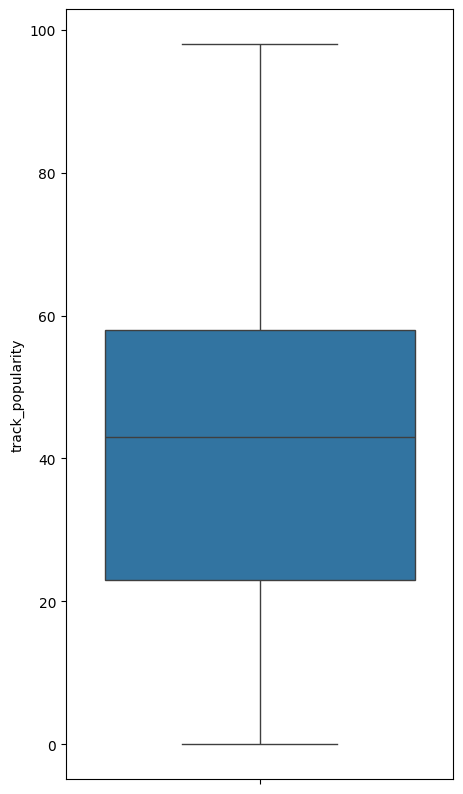

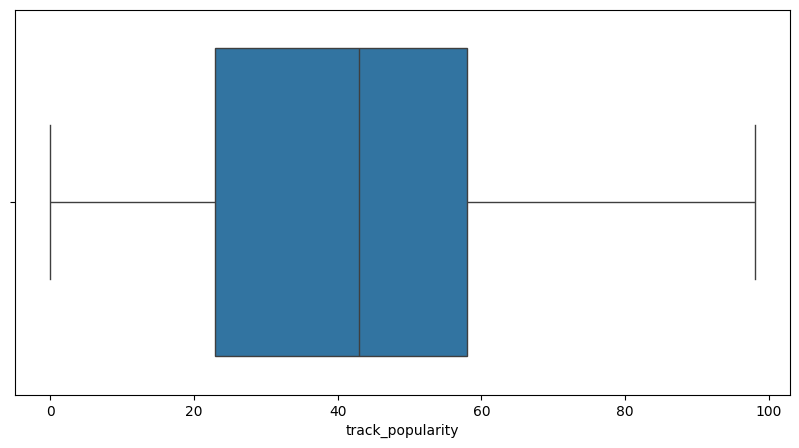

In [15]:
# Obtendo BOX PLOT de Popularidade

plt.figure(figsize=(5,10))
sns.boxplot(df_limpo['track_popularity']) # vertical por padrão
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x=df_limpo['track_popularity'])
plt.show()

### Dancebility

In [16]:
df_limpo['danceability'].describe()

count    23449.000000
mean         0.655214
std          0.146209
min          0.000000
25%          0.563000
50%          0.672000
75%          0.762000
max          0.983000
Name: danceability, dtype: float64

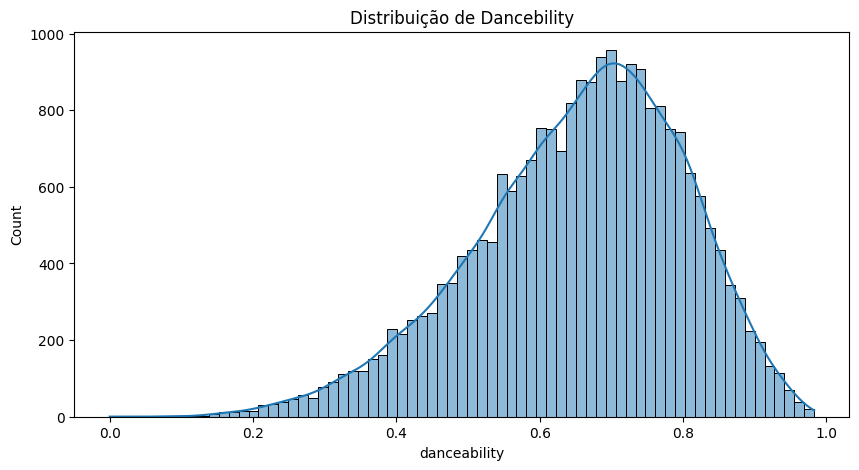

In [17]:
plt.figure(figsize=(10,5))
sns.histplot(df_limpo['danceability'], kde=True)
plt.title('Distribuição de Dancebility')
plt.show()

## Filtrando os DataFrames

In [18]:
df_hit = df_limpo[df_limpo.track_popularity >= 58]  #Q3
df_naohit = df_limpo[df_limpo.track_popularity <= 23] #Q1

In [19]:
print(df_hit.shape)
print(df_naohit.shape)

(6048, 23)
(6016, 23)


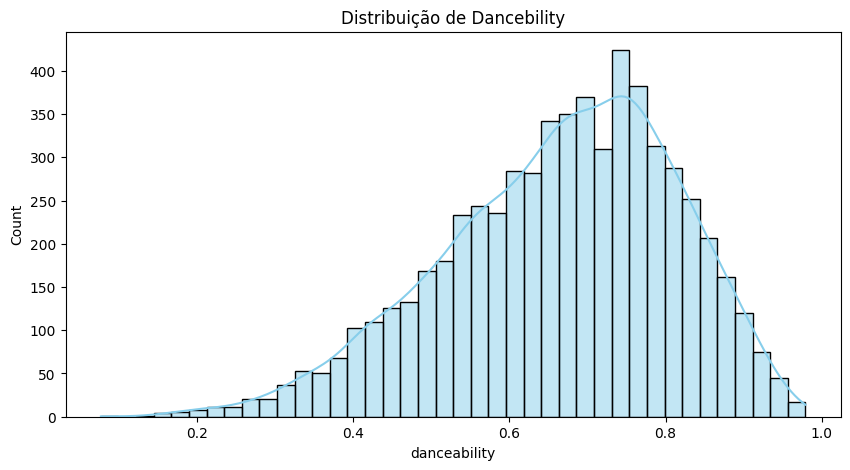

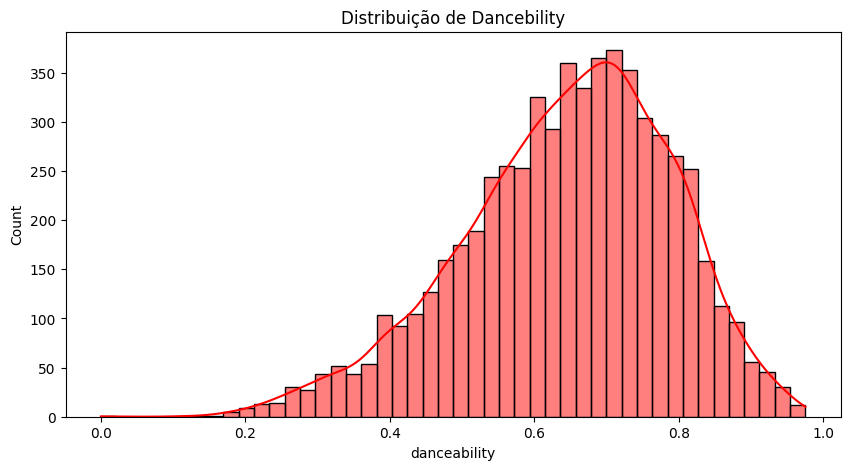

In [20]:
plt.figure(figsize=(10,5))
sns.histplot(df_hit['danceability'], kde=True, color='skyblue')
plt.title('Distribuição de Dancebility')
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(df_naohit['danceability'], kde=True, color='red')
plt.title('Distribuição de Dancebility')
plt.show()

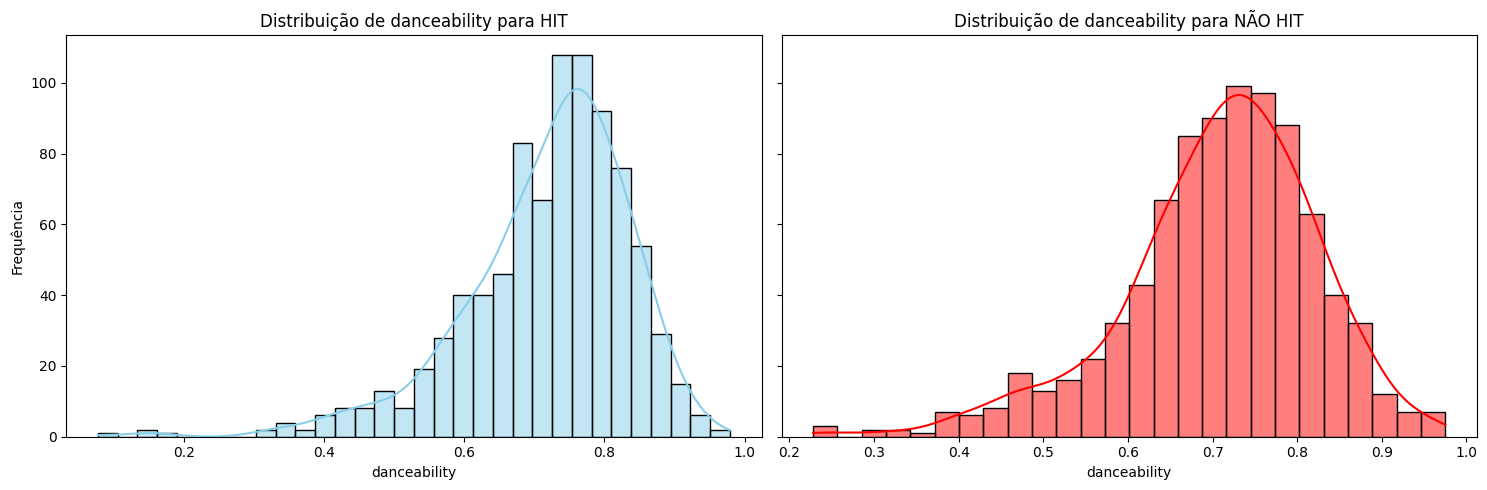

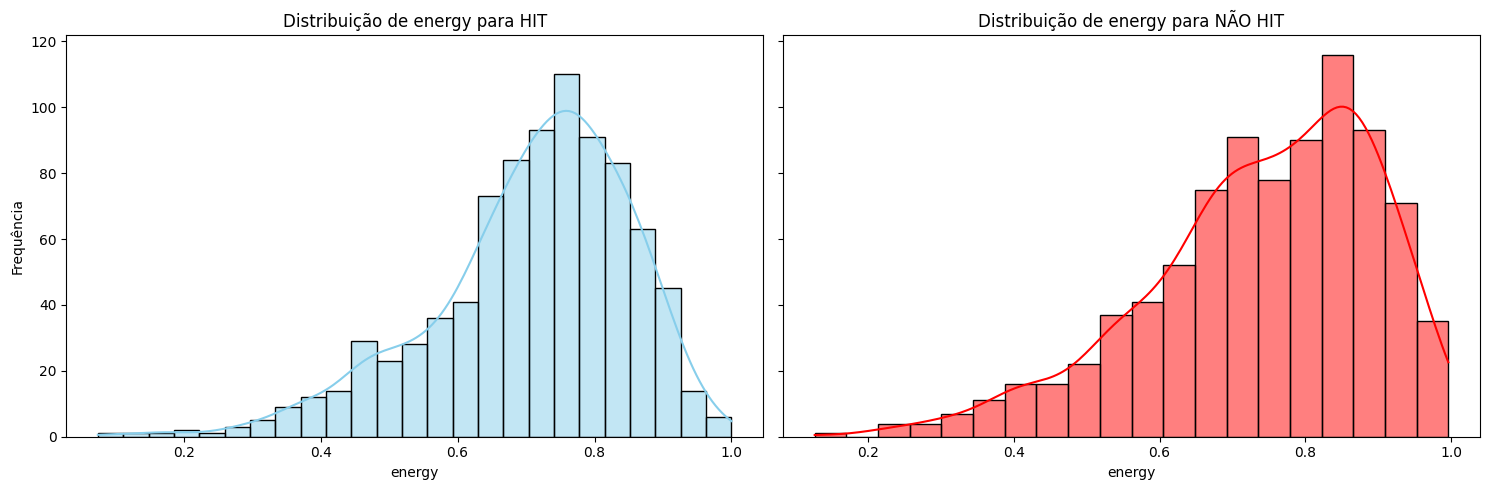

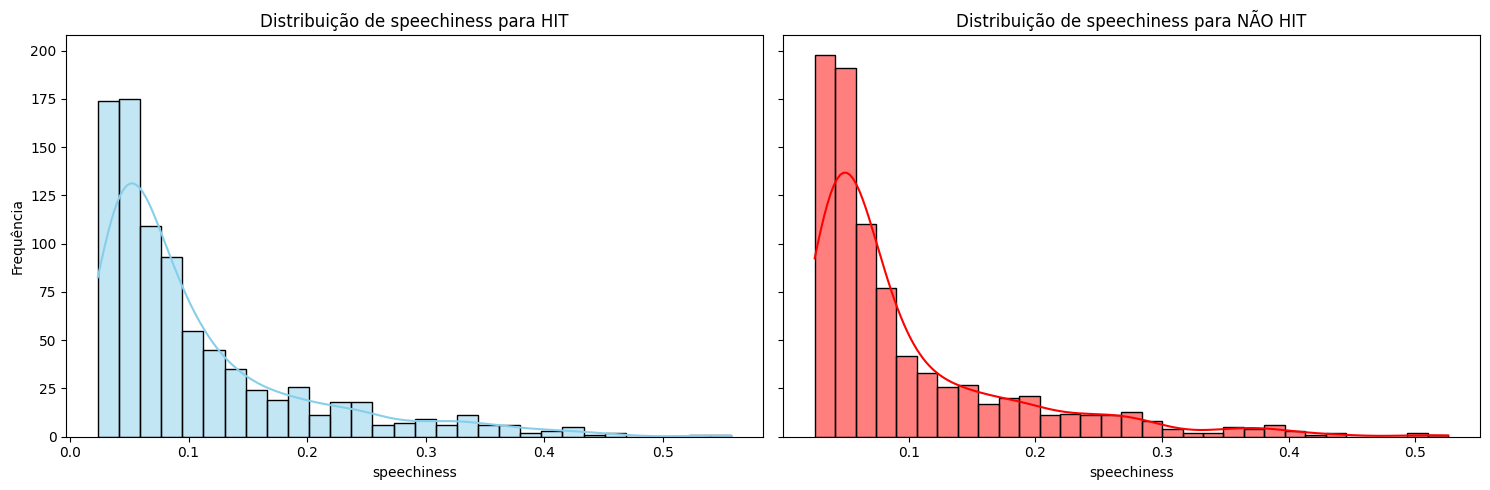

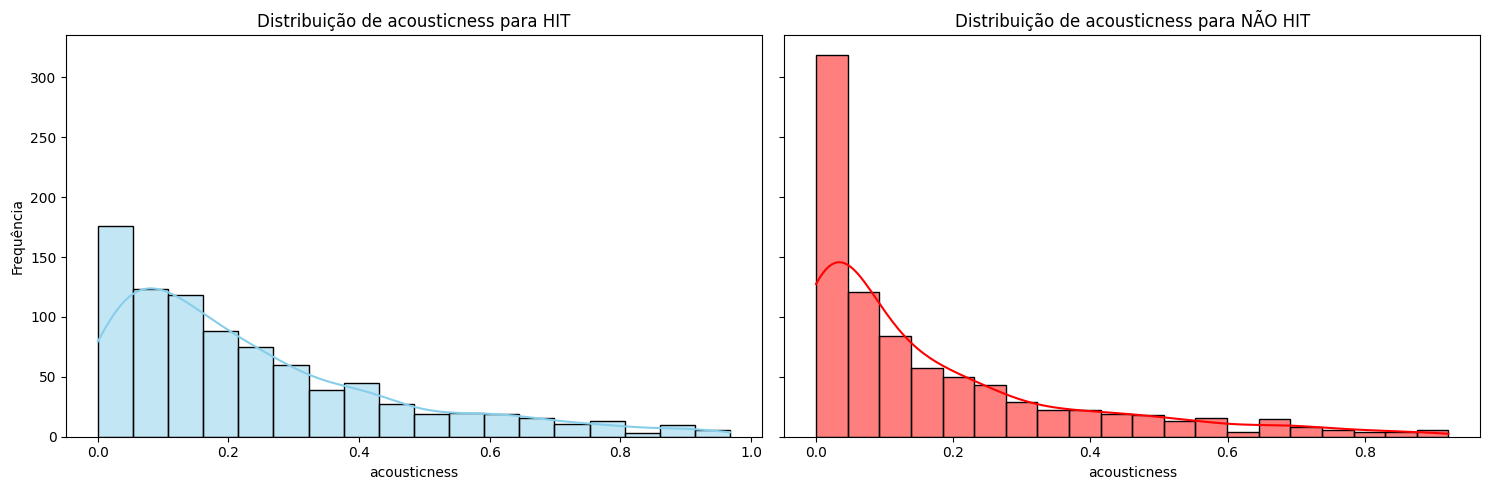

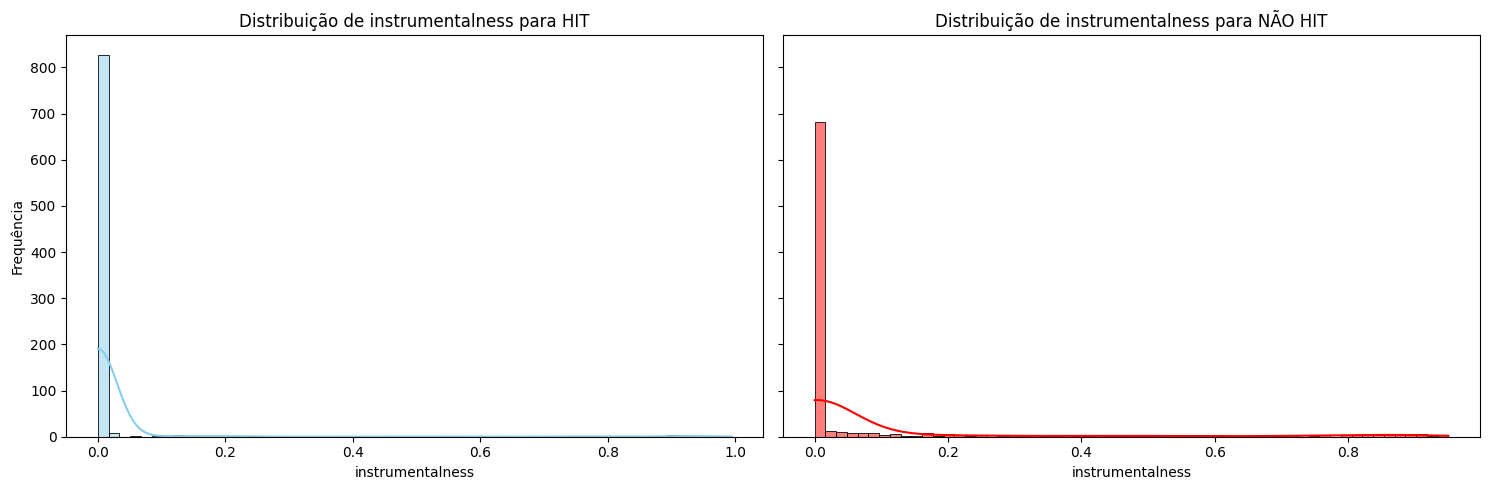

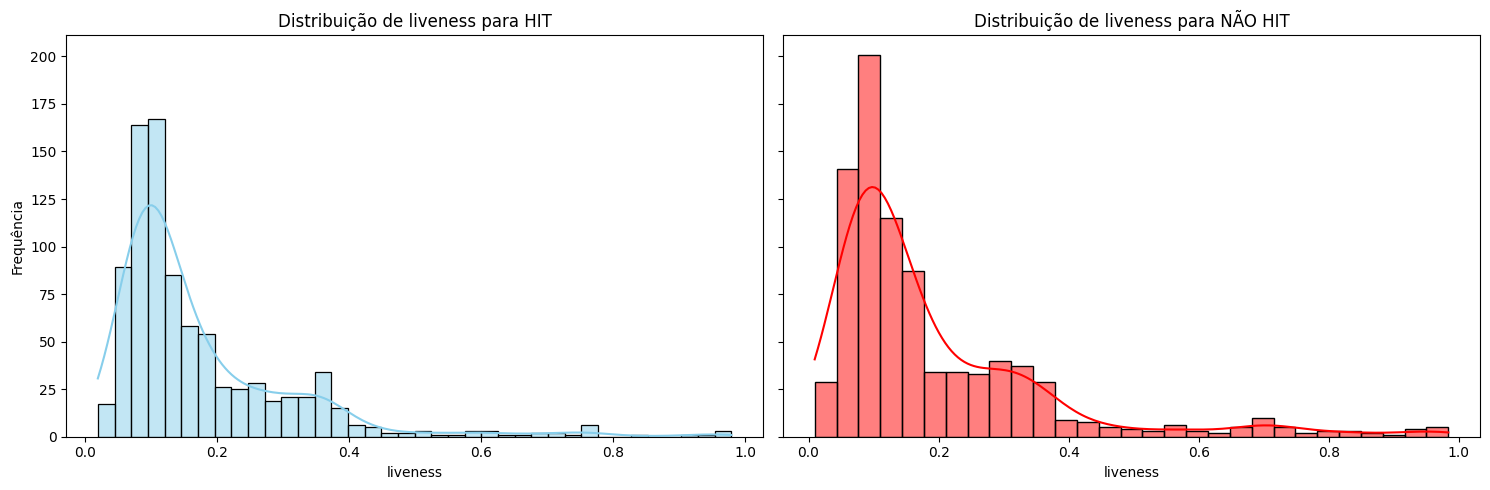

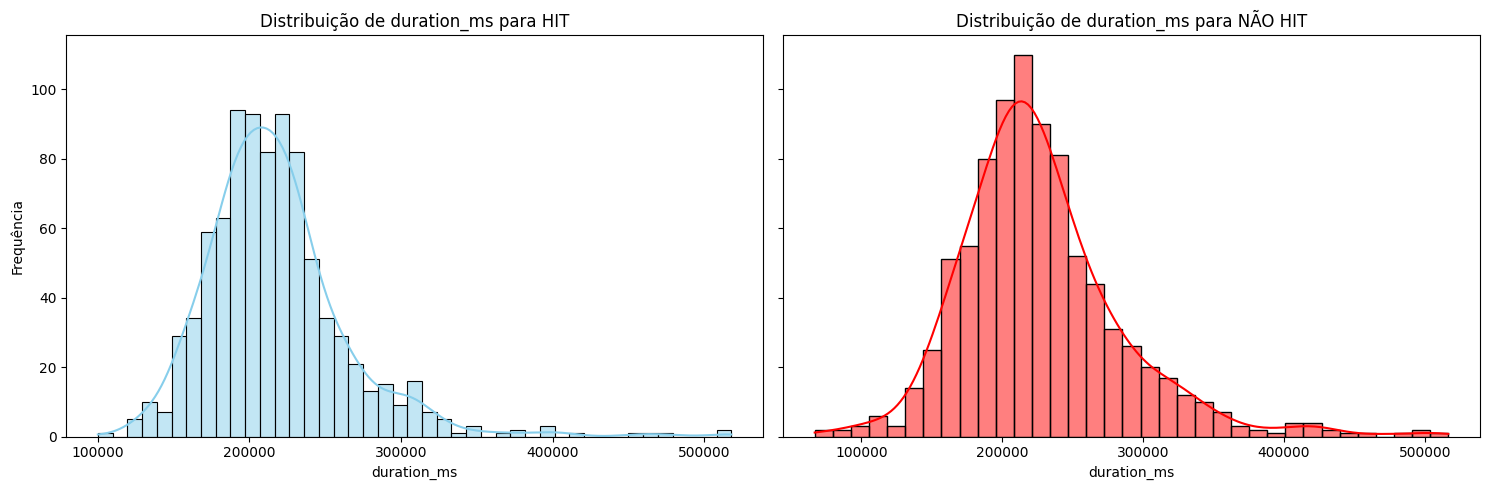

In [73]:
# Fluxo Completo para mais variáveis
variaveis_alvo = ['danceability', 'energy', 'speechiness',
                  'acousticness', 'instrumentalness', 'liveness',
                  'duration_ms']

# Para cada variável, plotar gráficos para HIT e NAO HIT lado a lado
for variavel in variaveis_alvo:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

    sns.histplot(df_hit[variavel], kde=True, color='skyblue', ax=axes[0])
    axes[0].set_title(f'Distribuição de {variavel} para HIT')
    axes[0].set_xlabel(variavel)
    axes[0].set_ylabel('Frequência')

    sns.histplot(df_naohit[variavel], kde=True, color='red', ax=axes[1])
    axes[1].set_title(f'Distribuição de {variavel} para NÃO HIT')
    axes[1].set_xlabel(variavel)
    axes[1].set_ylabel('Frequência')

    plt.tight_layout()
    plt.show()

# Replicando Análise por Gênero Musical

In [22]:
# Quais Gêneros temos no nosso DataFrame?
df_limpo.playlist_genre.value_counts()

playlist_genre
rap      4877
pop      4572
edm      3817
latin    3417
r&b      3400
rock     3366
Name: count, dtype: int64

In [49]:
print(dict(df_limpo['track_popularity'].describe())['25%']) #Q1
print(dict(df_limpo['track_popularity'].describe())['75%']) #Q3

23.0
58.0


In [55]:
# Lista de Gêneros
genre_list = list(set(df_limpo.playlist_genre.tolist()))
print(genre_list)

['edm', 'rap', 'r&b', 'pop', 'rock', 'latin']


In [75]:
# Dicionário de DataFrame's por Gênero
df_list = [{f'df_{genre}': df_limpo[df_limpo['playlist_genre']==genre]} for genre in genre_list]

 Gênero: df_edm


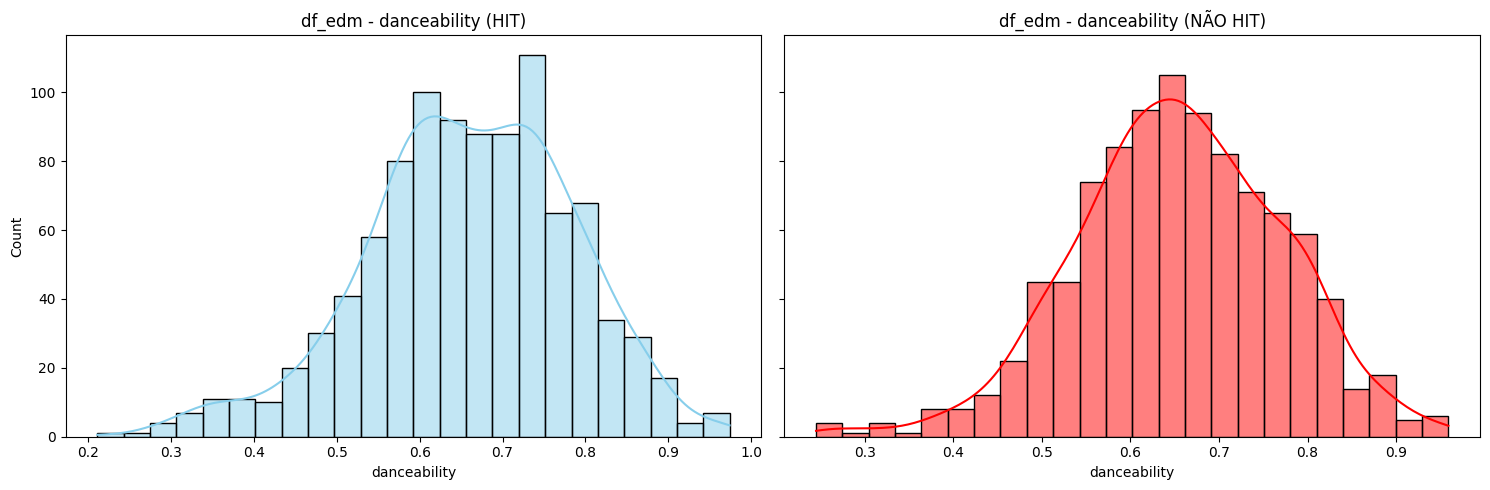

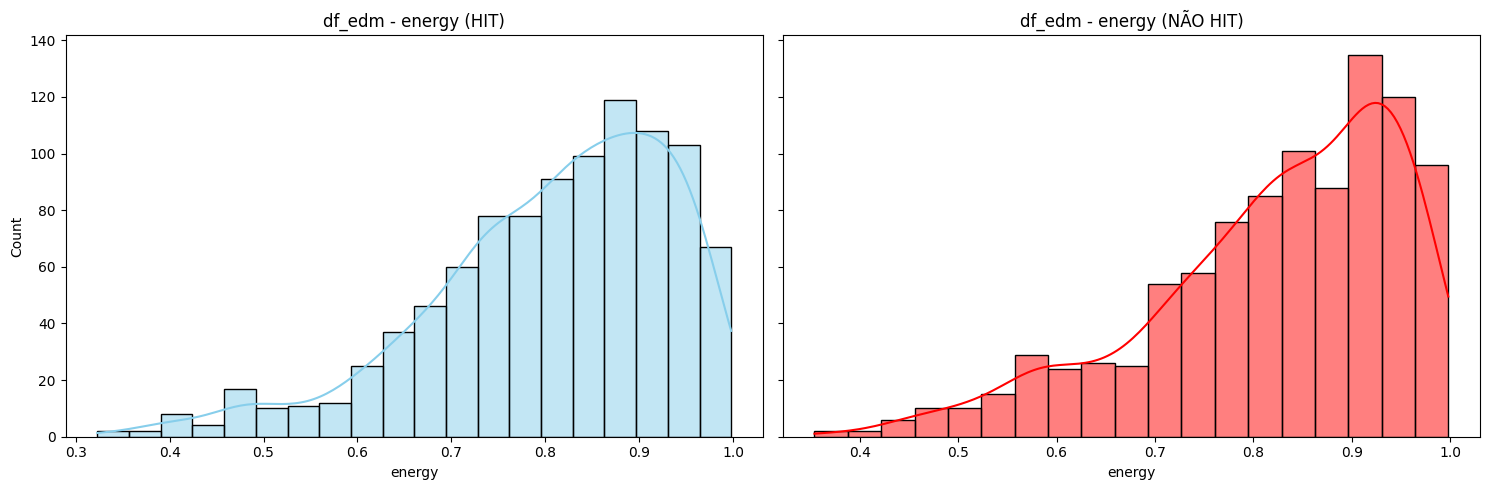

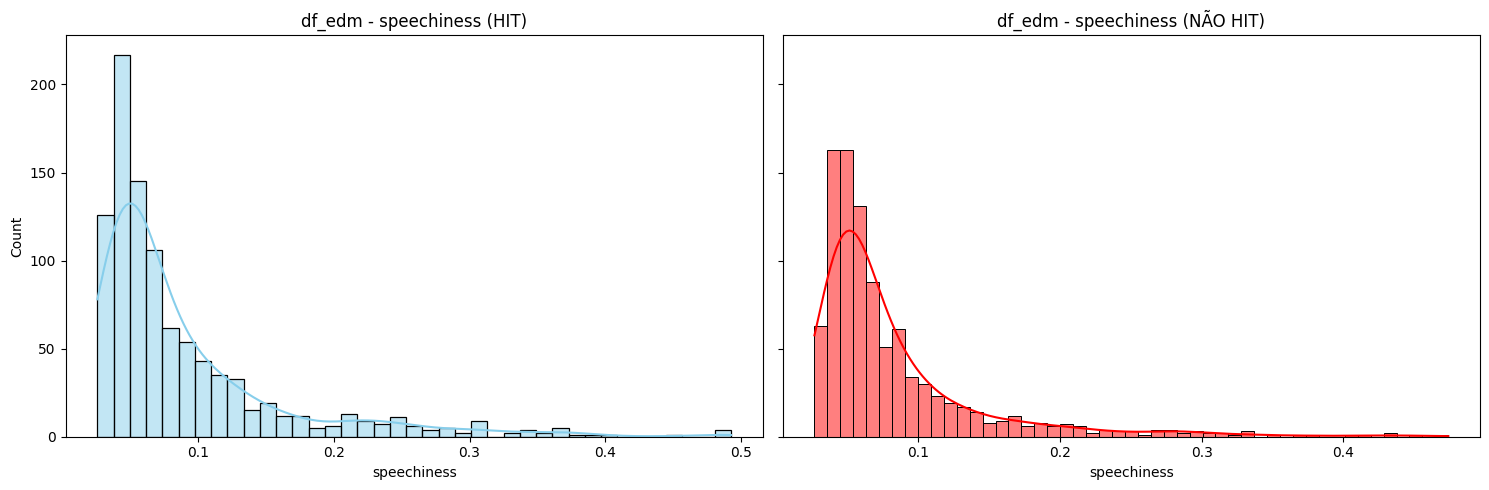

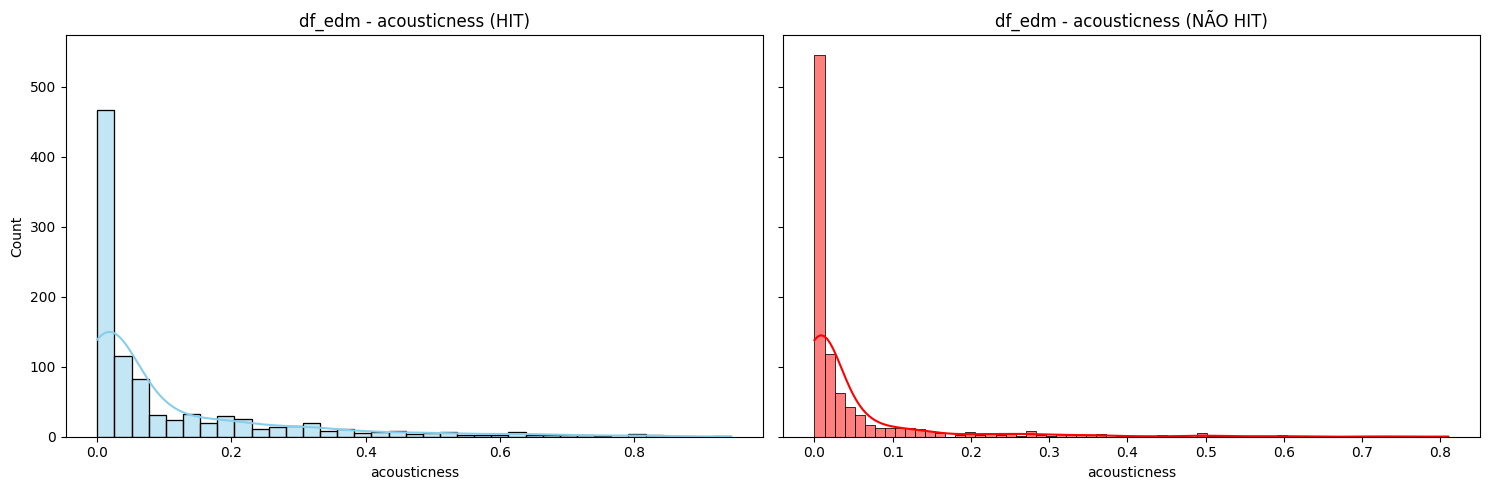

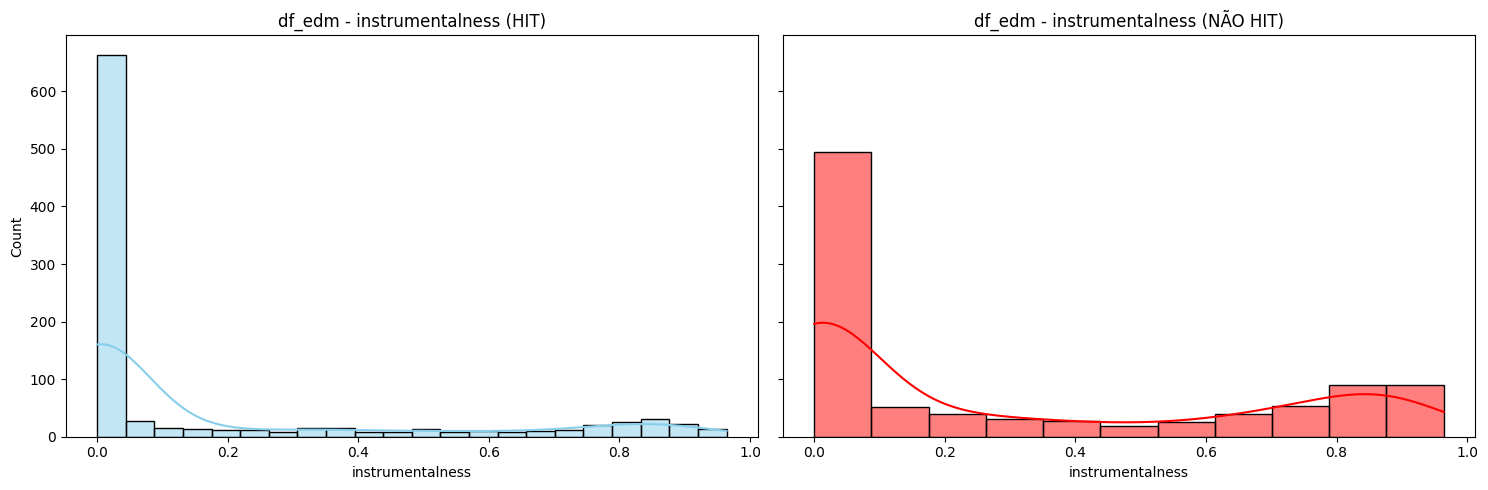

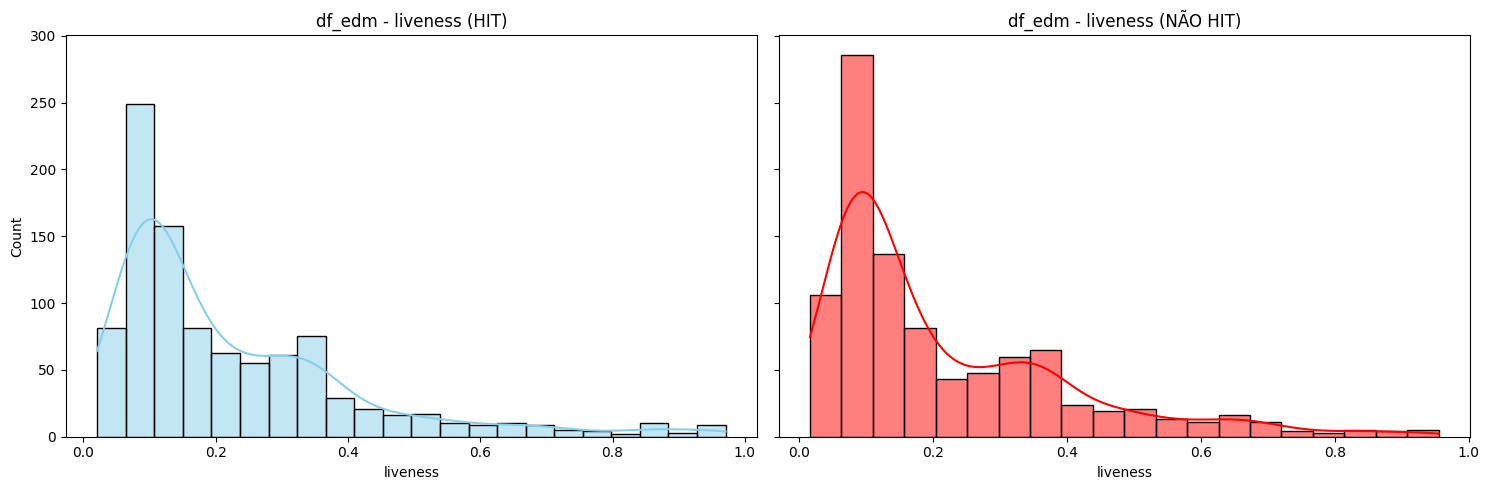

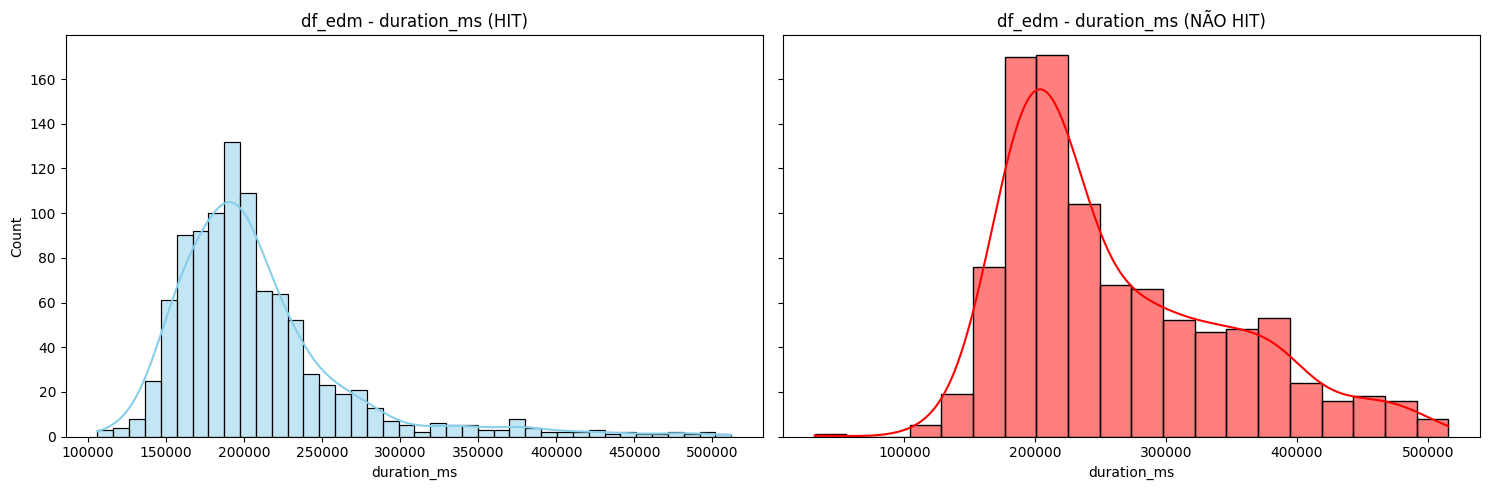

 Gênero: df_rap


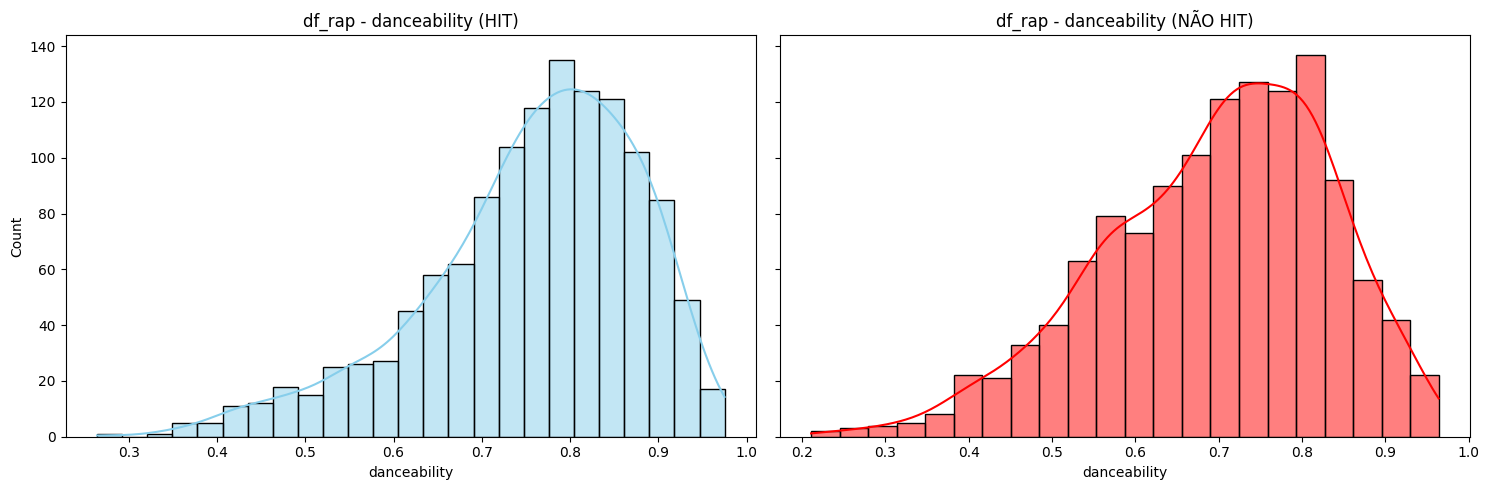

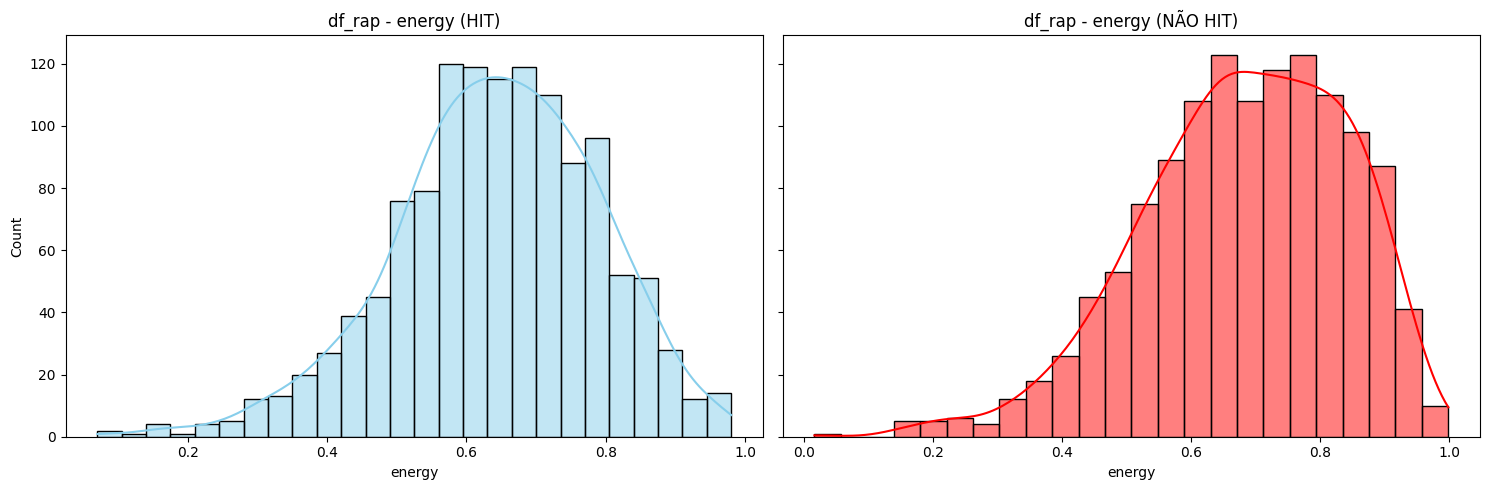

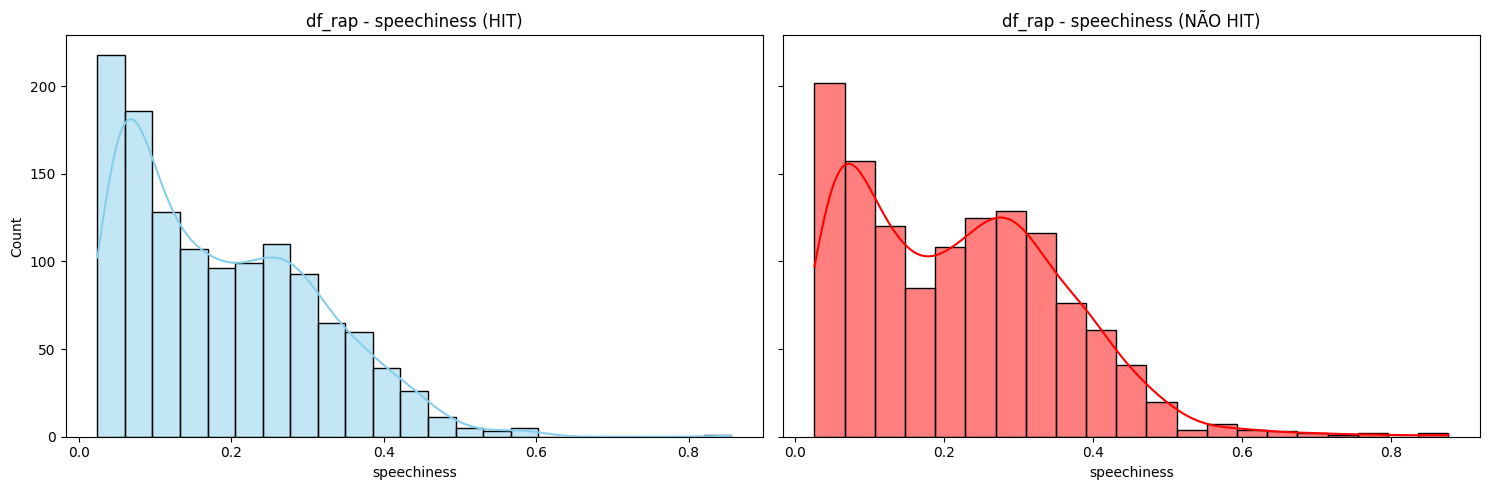

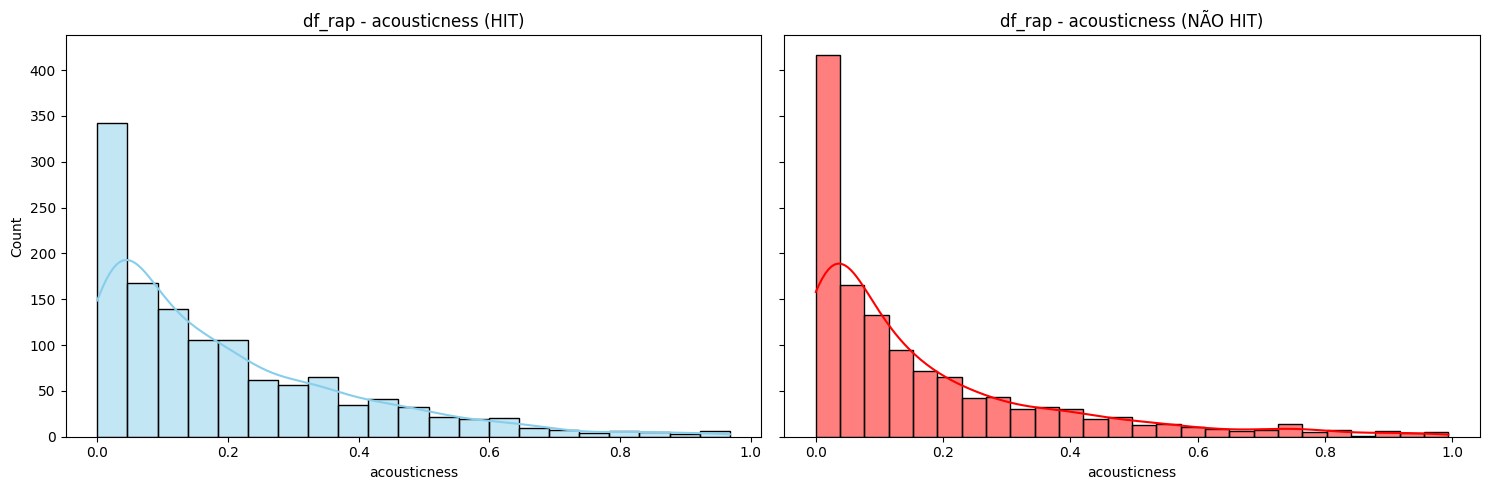

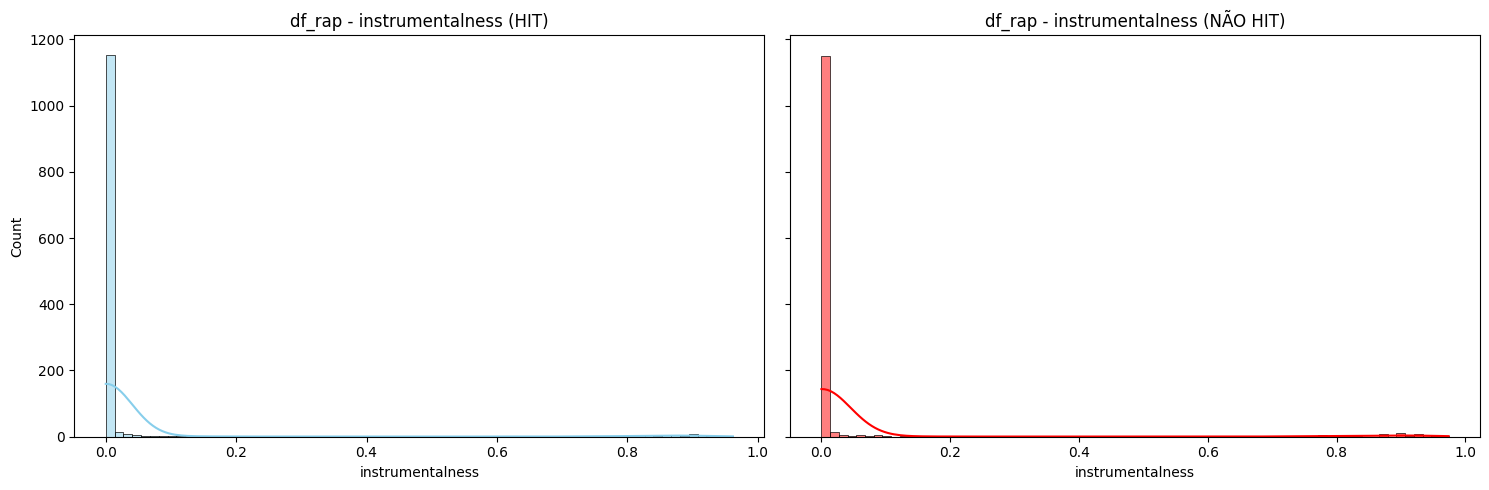

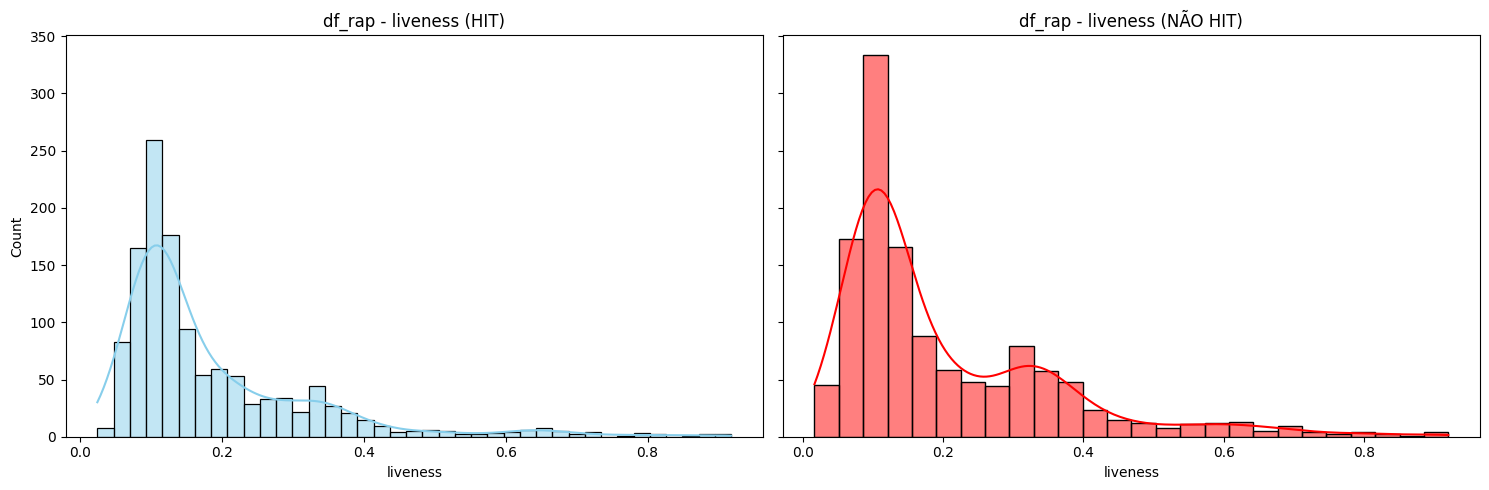

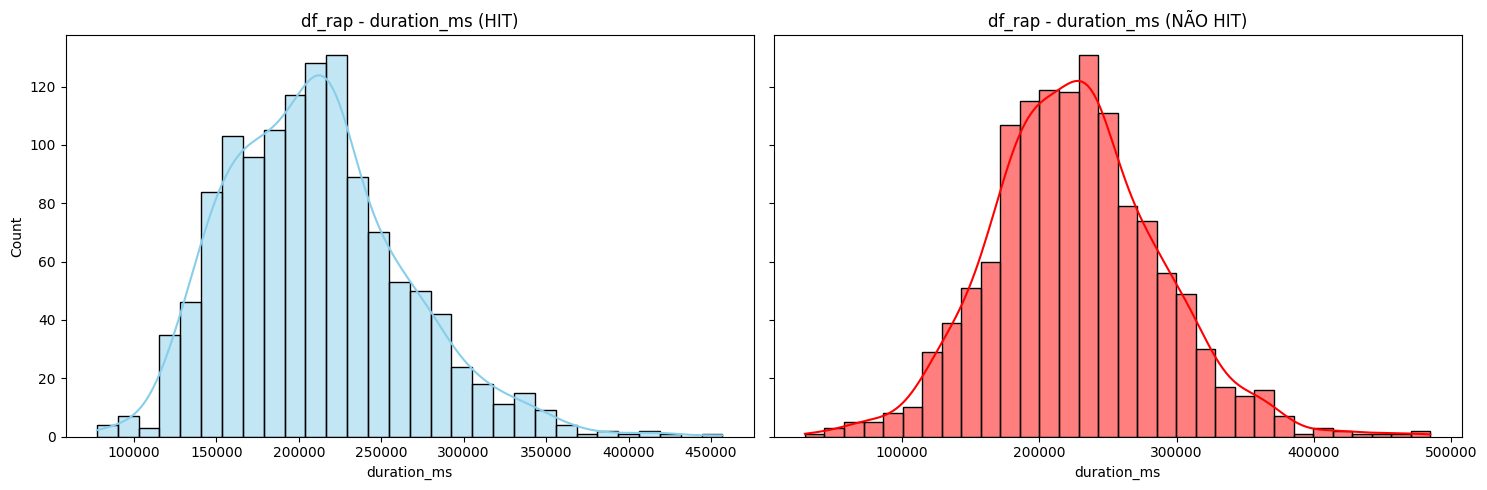

 Gênero: df_r&b


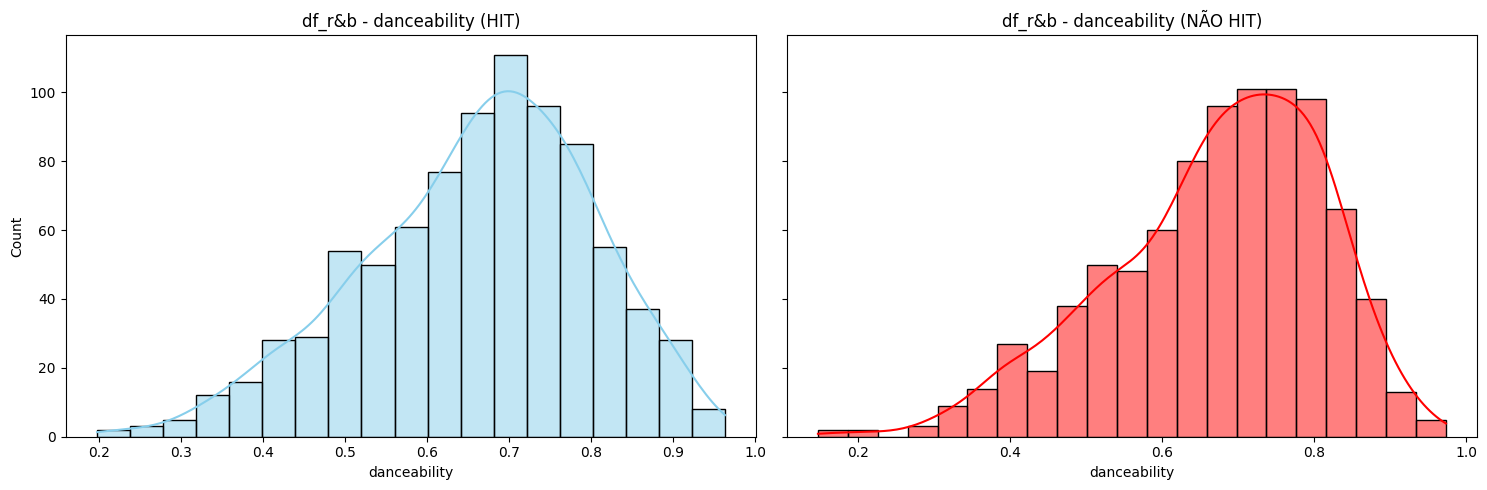

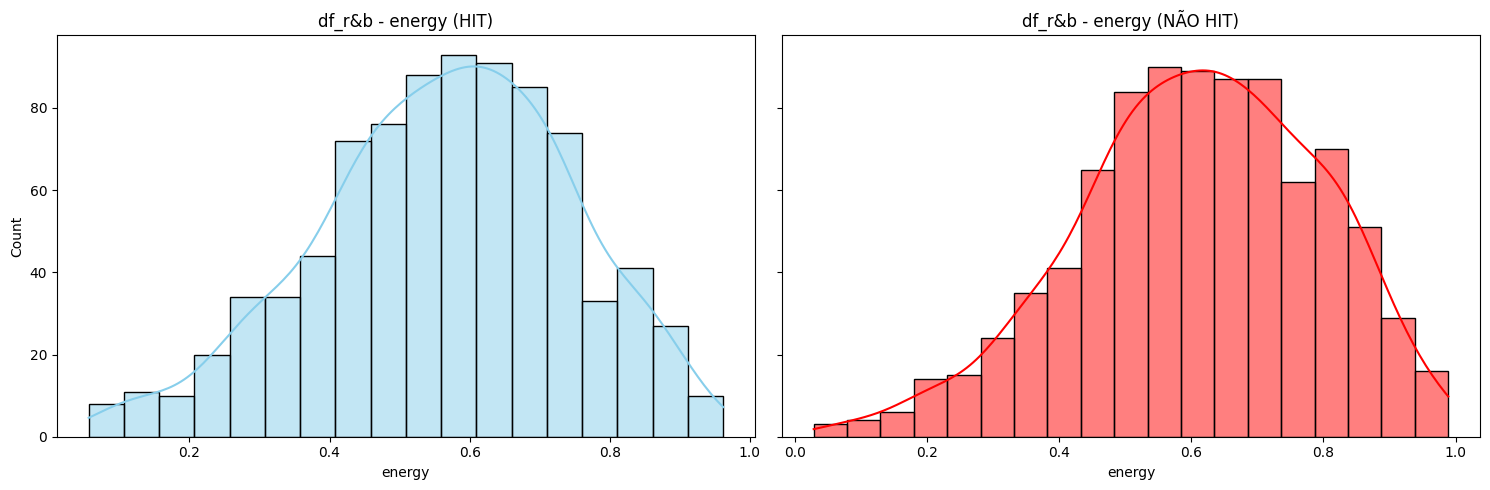

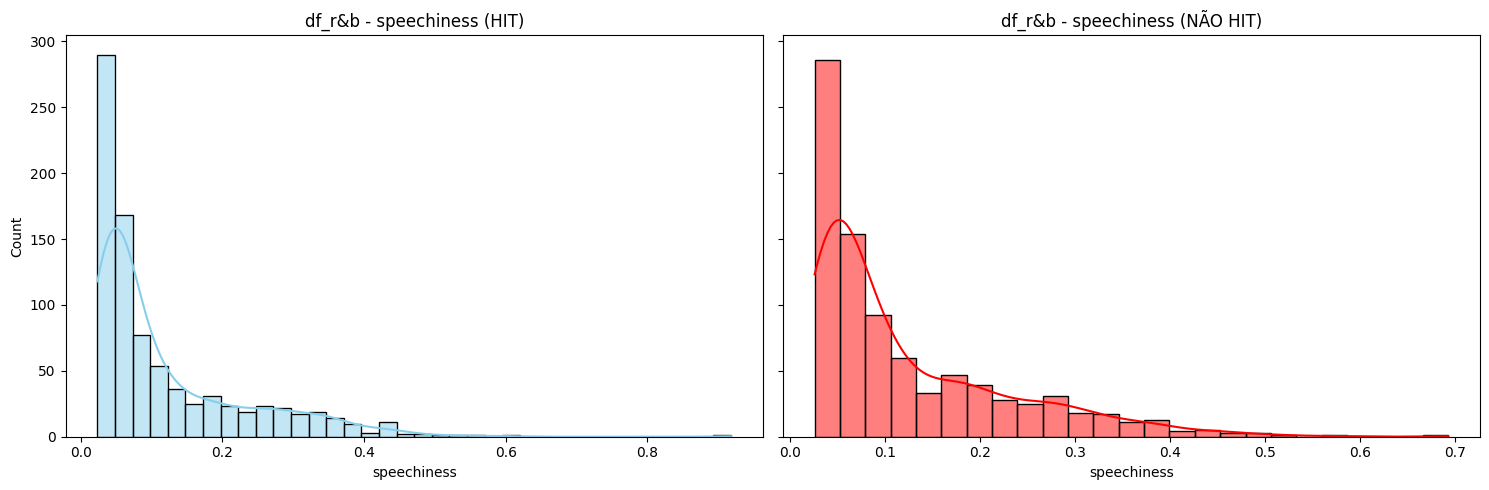

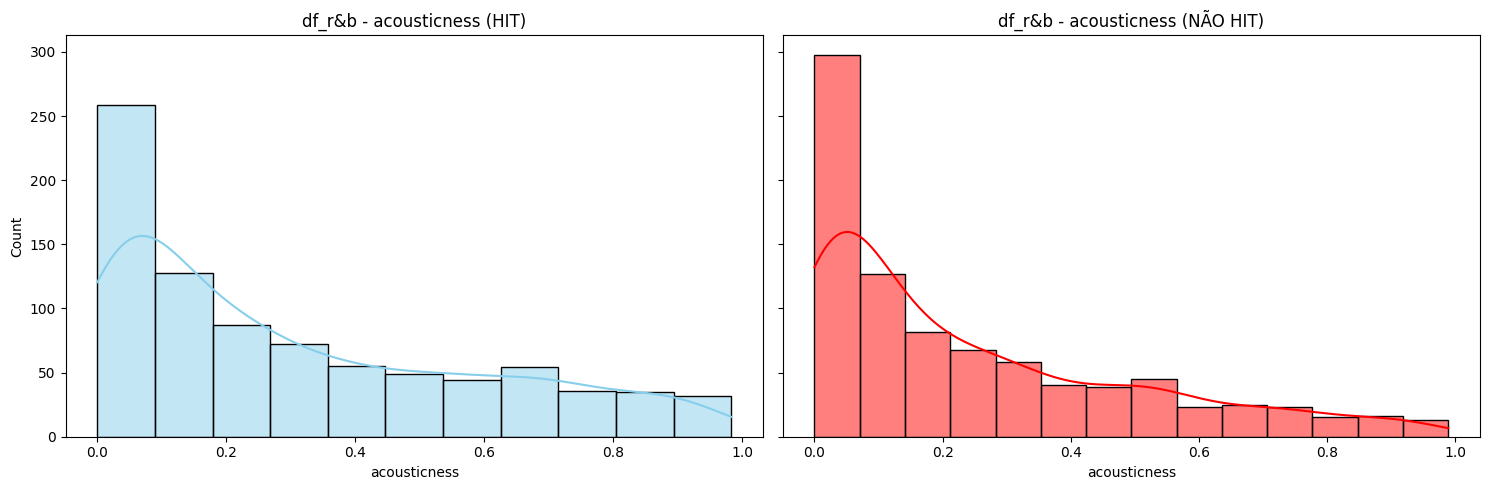

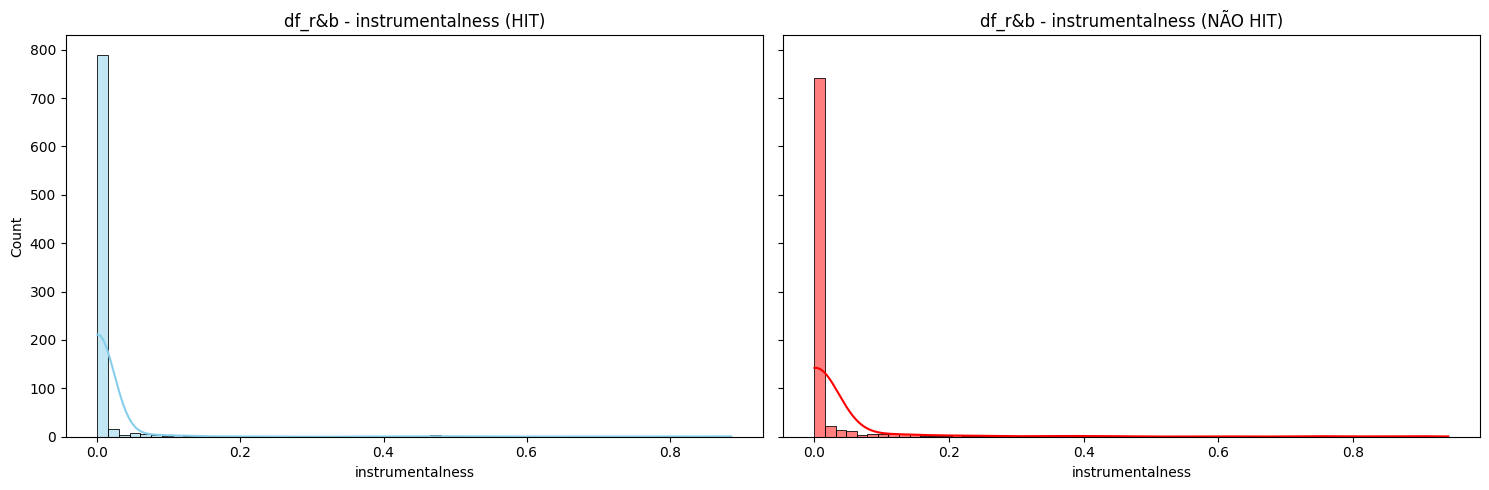

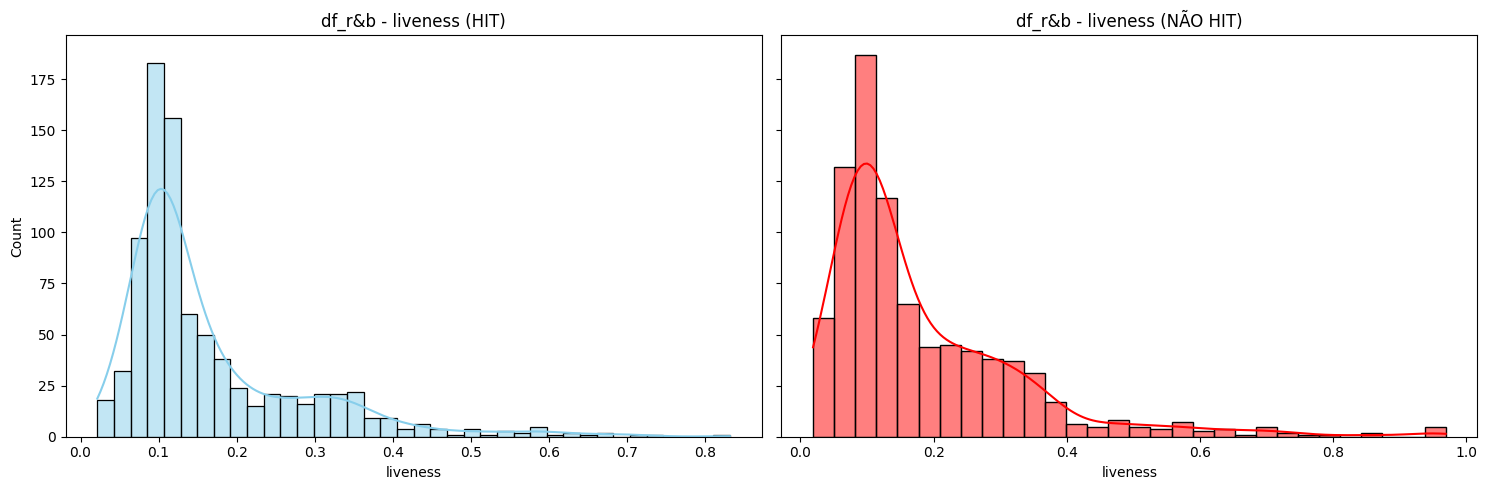

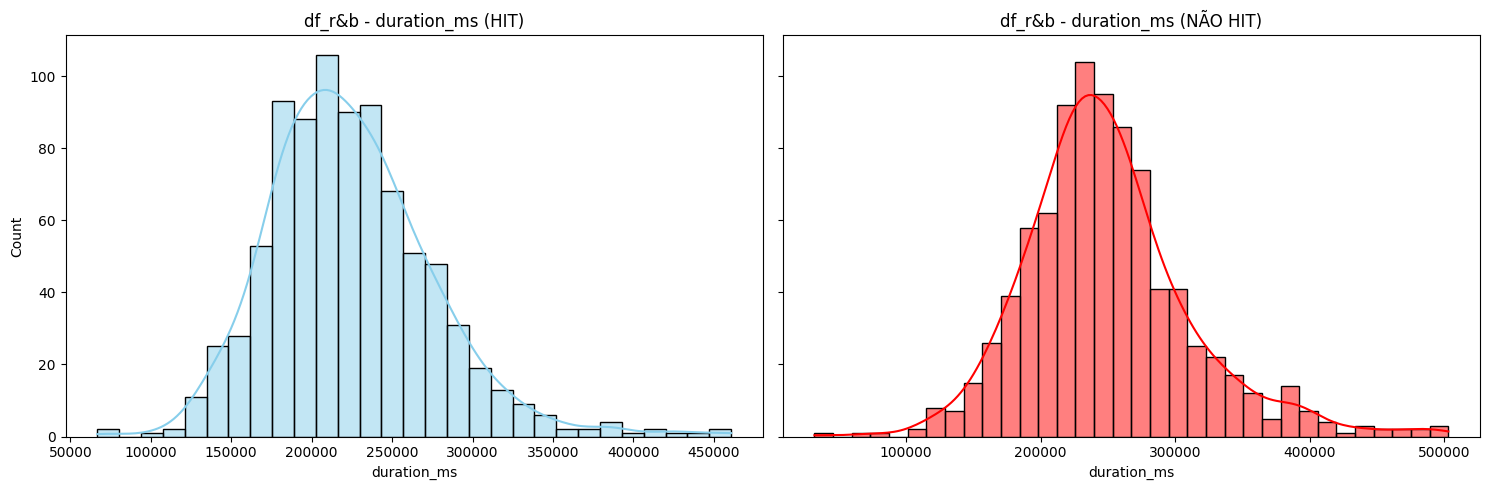

 Gênero: df_pop


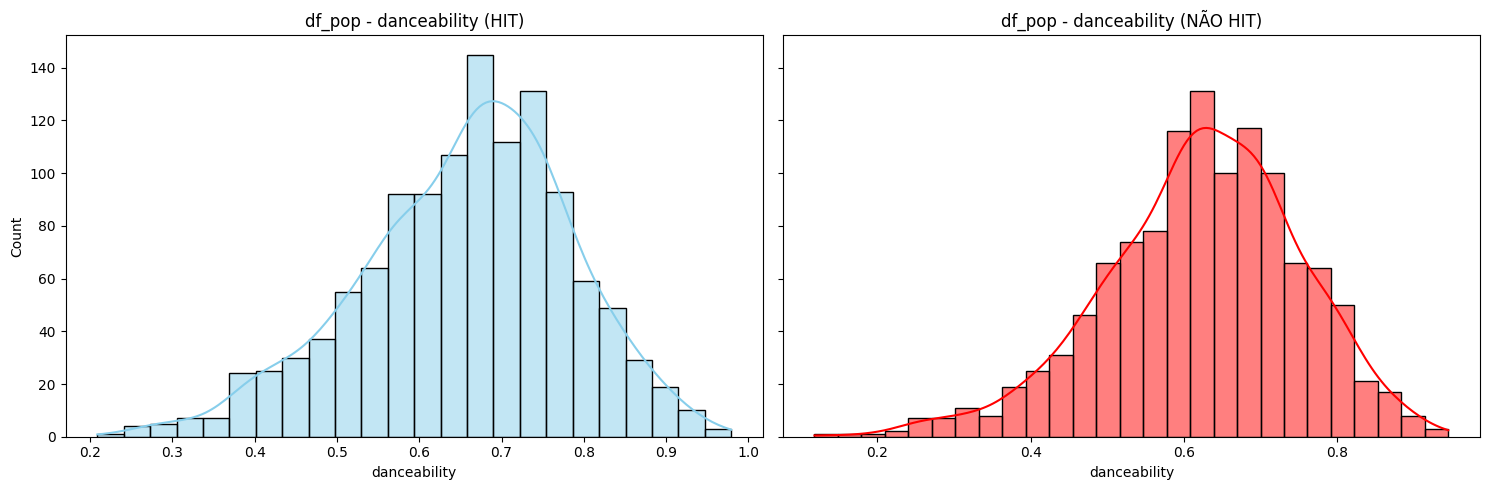

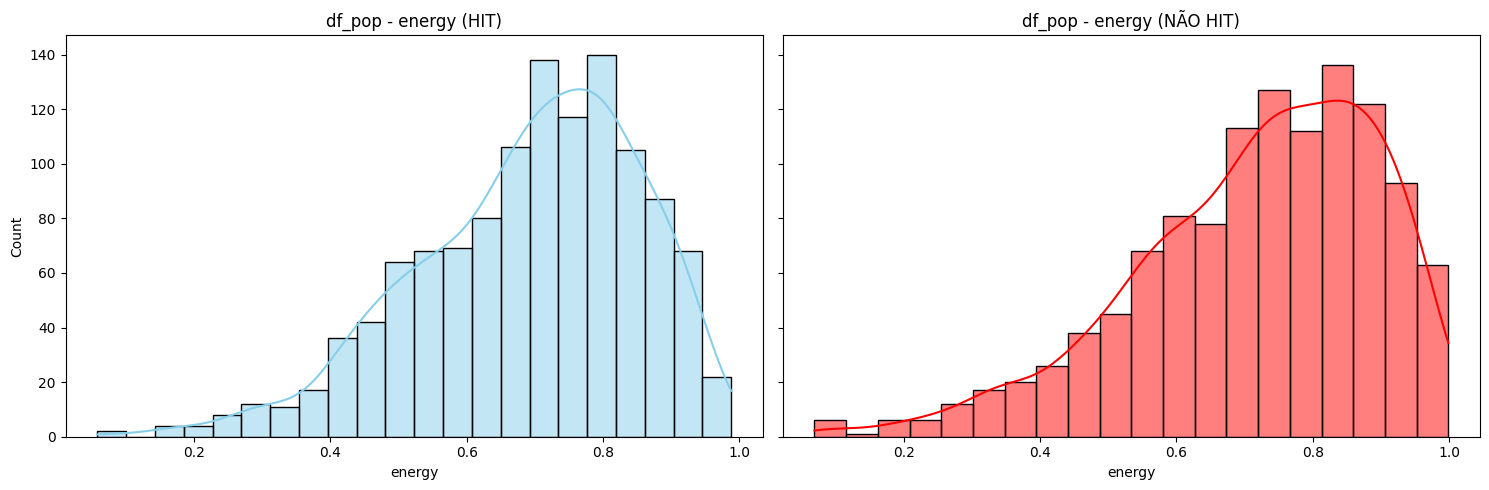

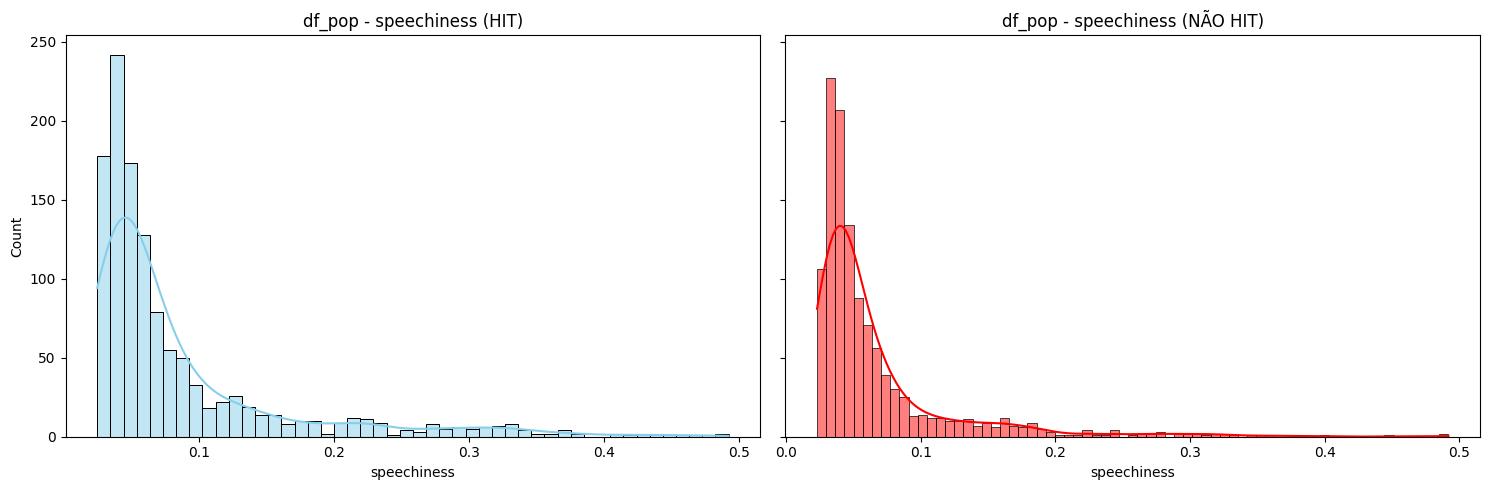

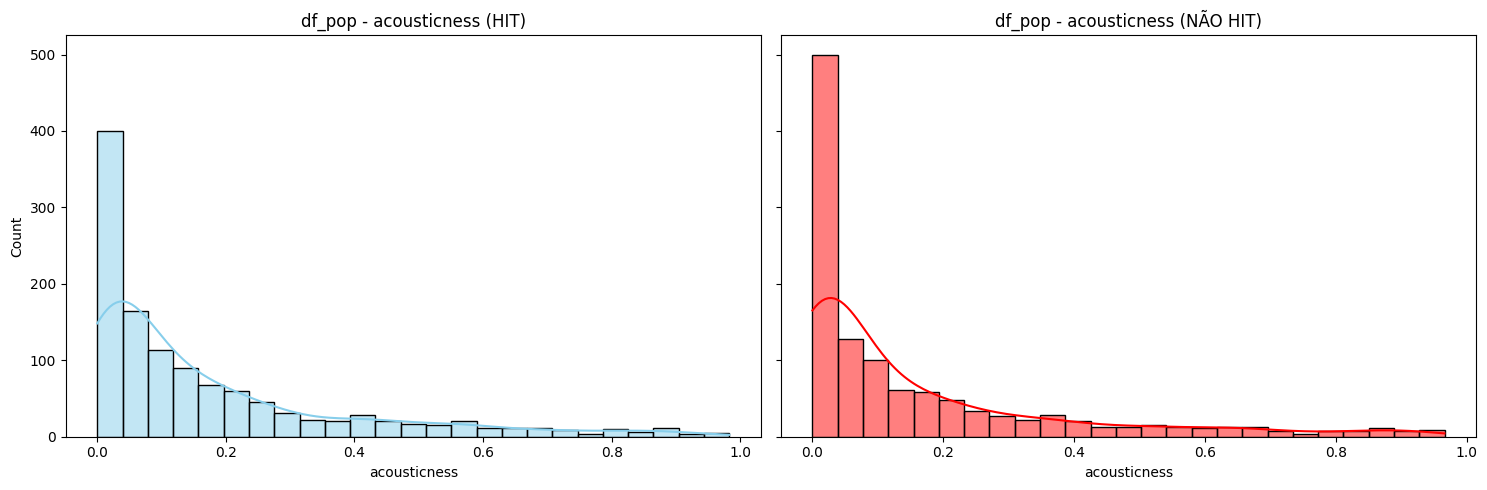

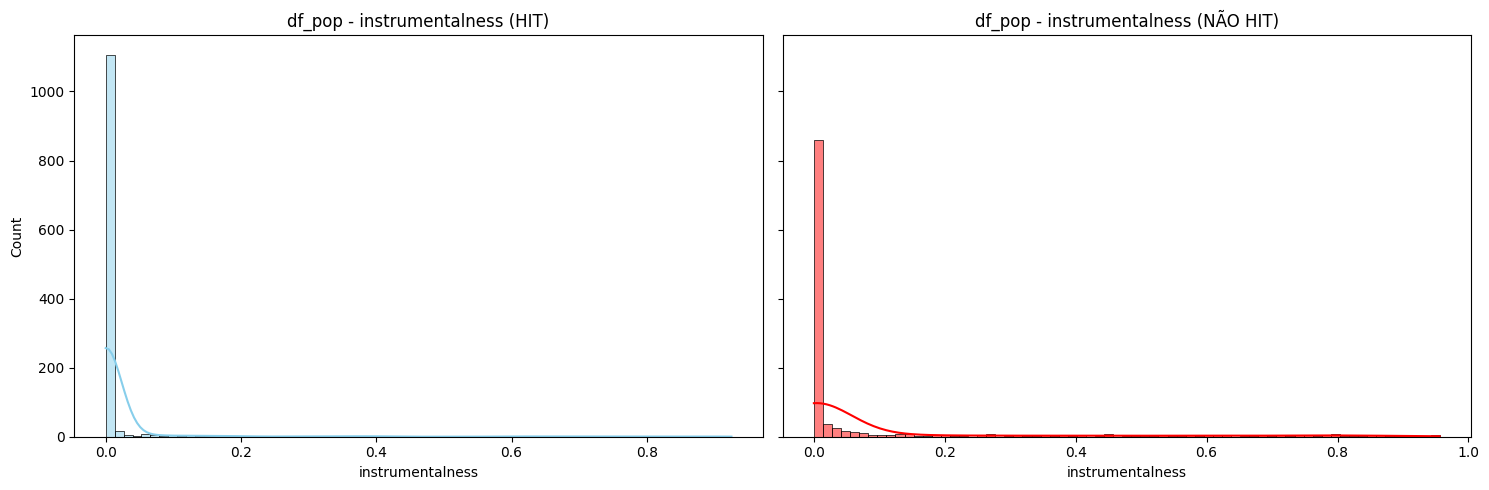

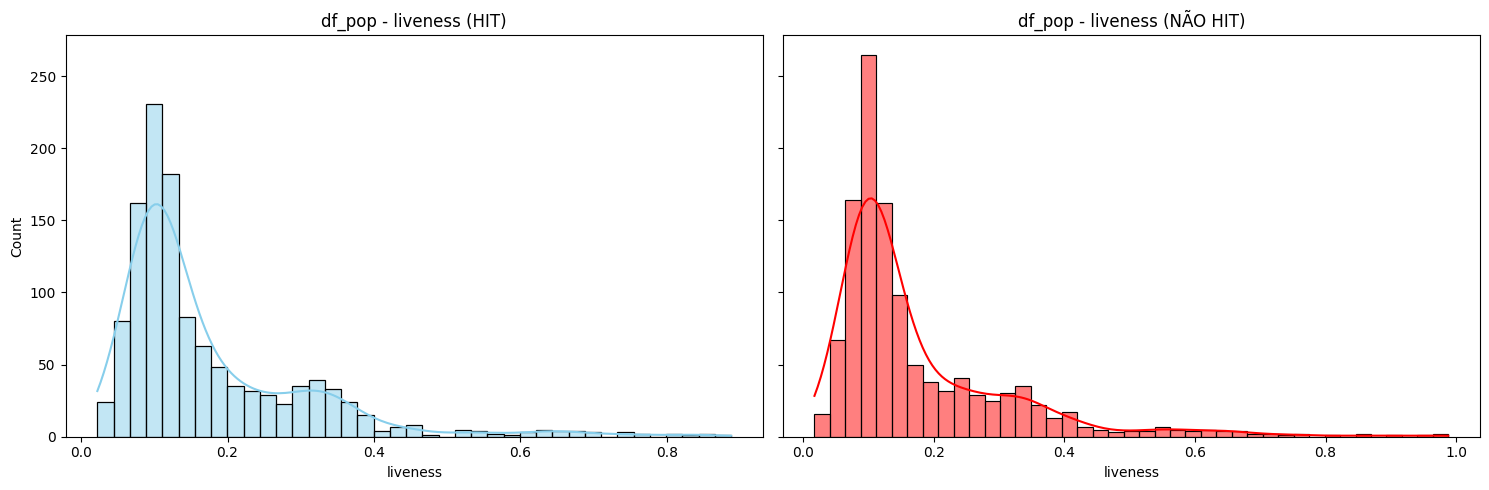

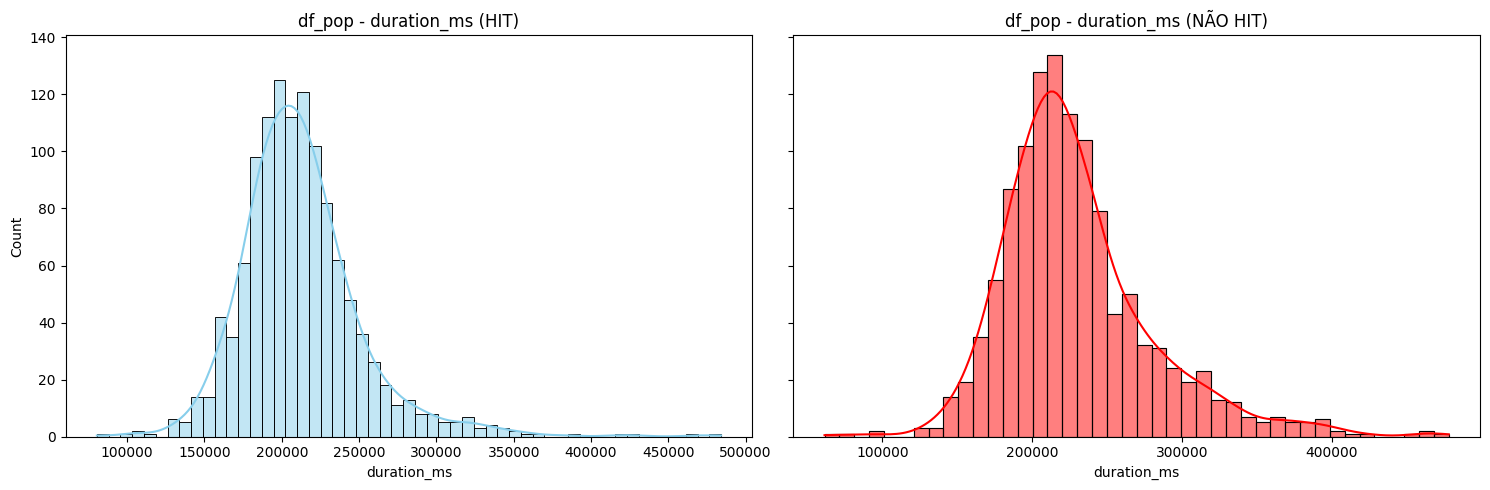

 Gênero: df_rock


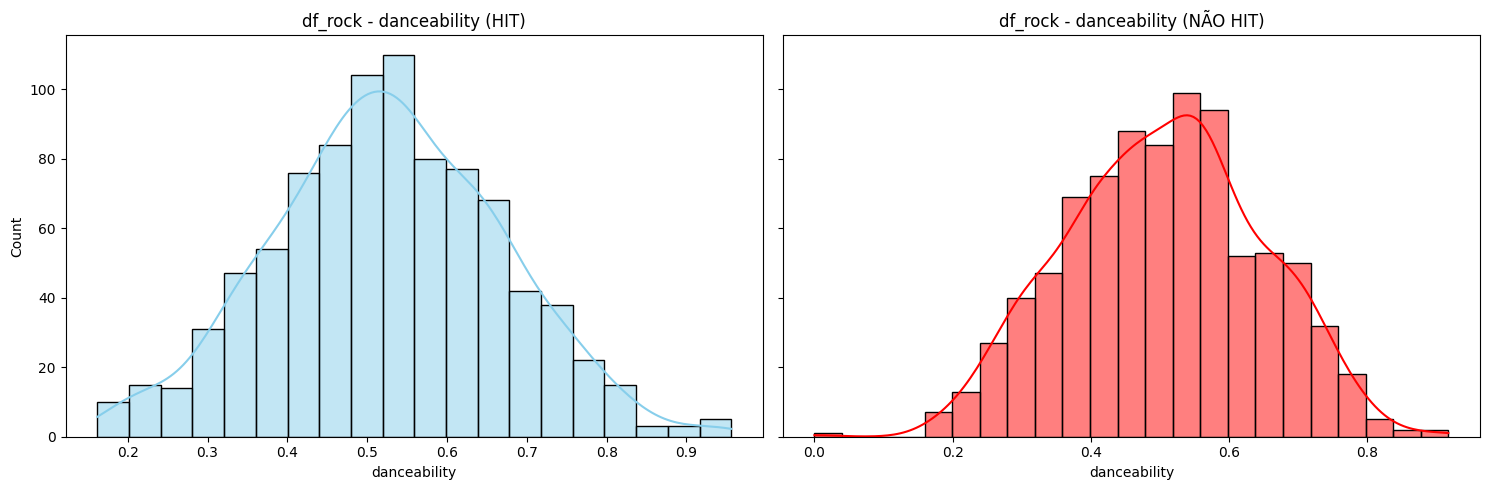

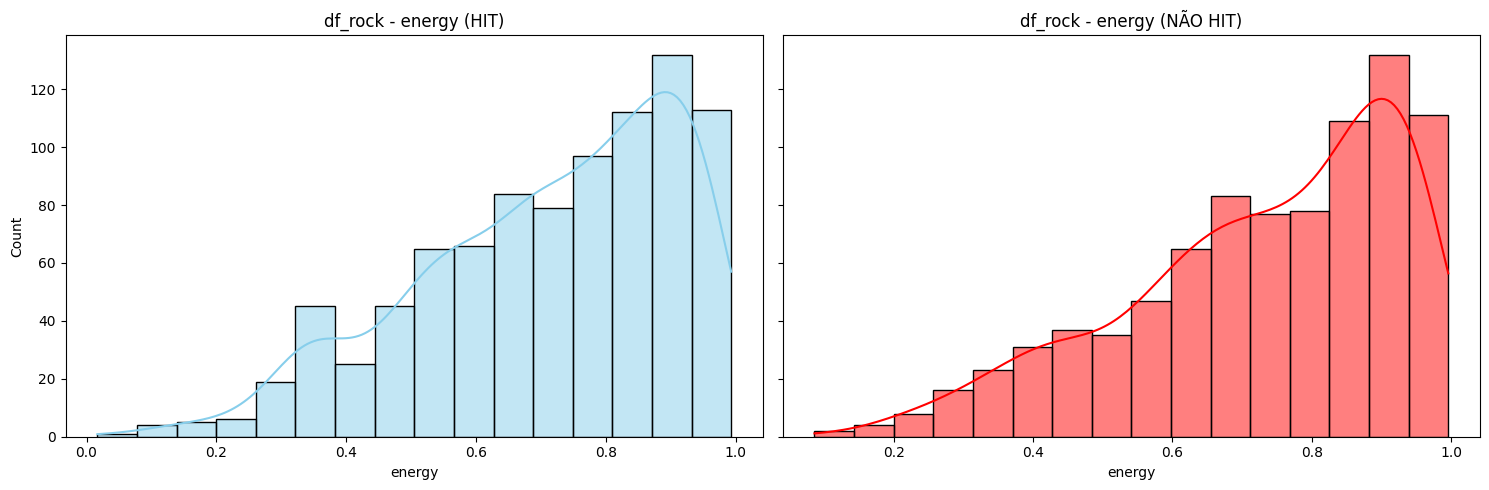

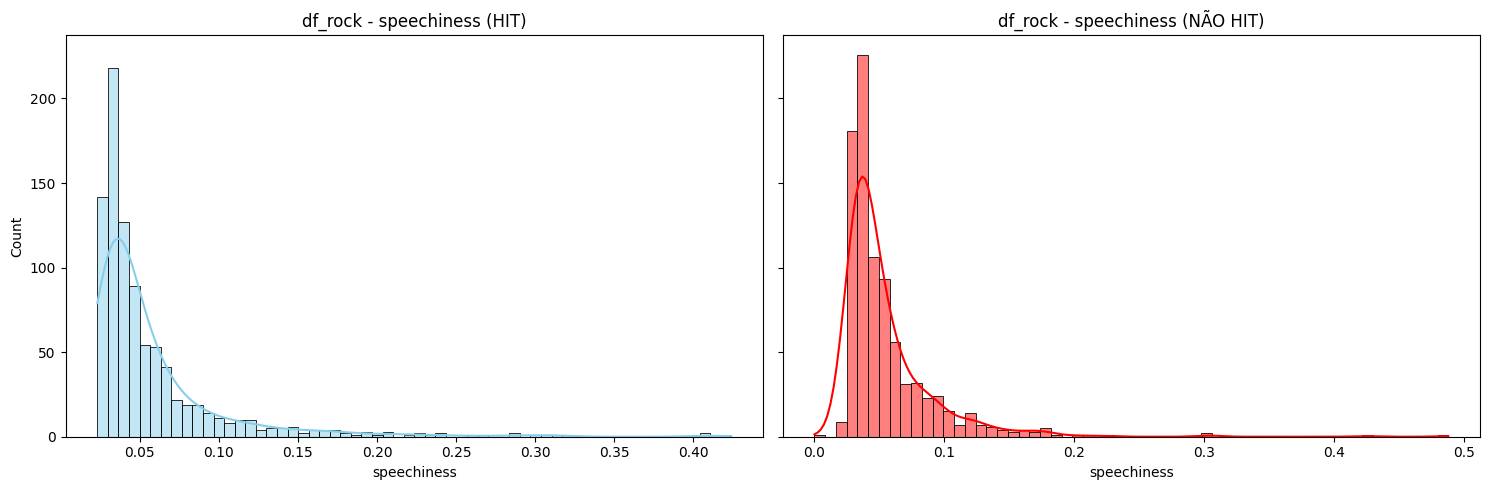

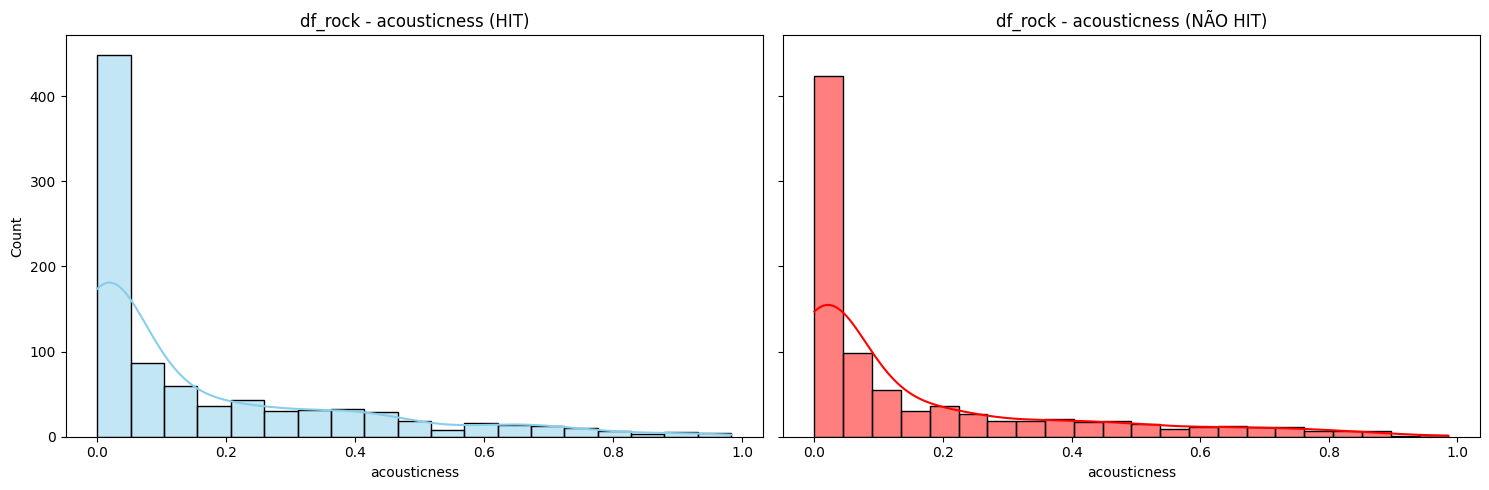

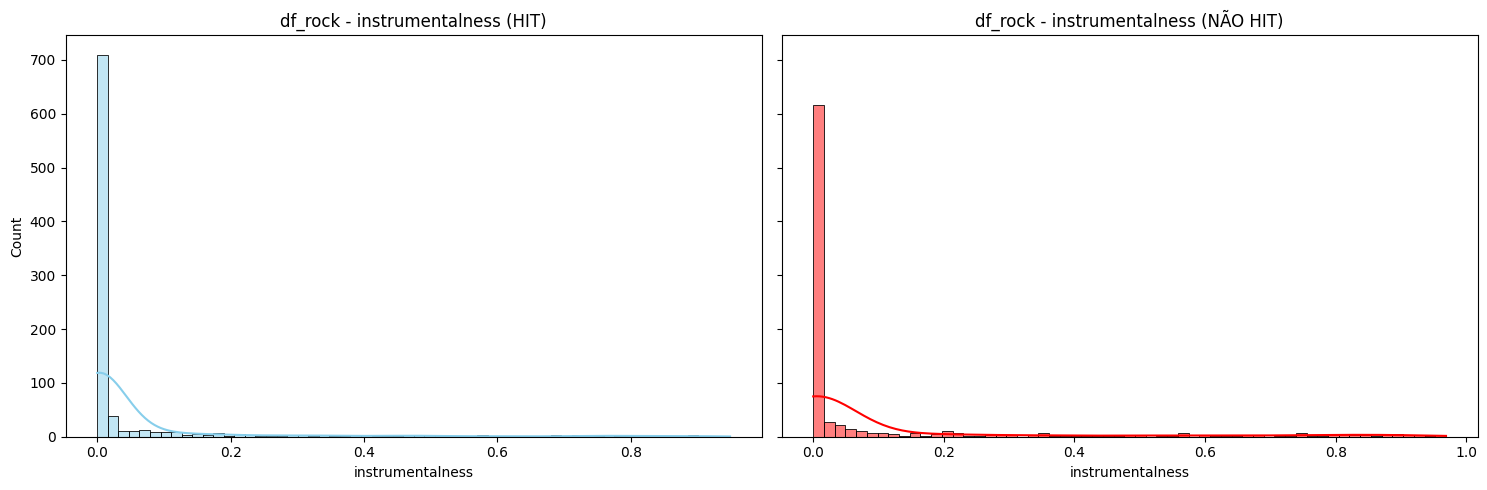

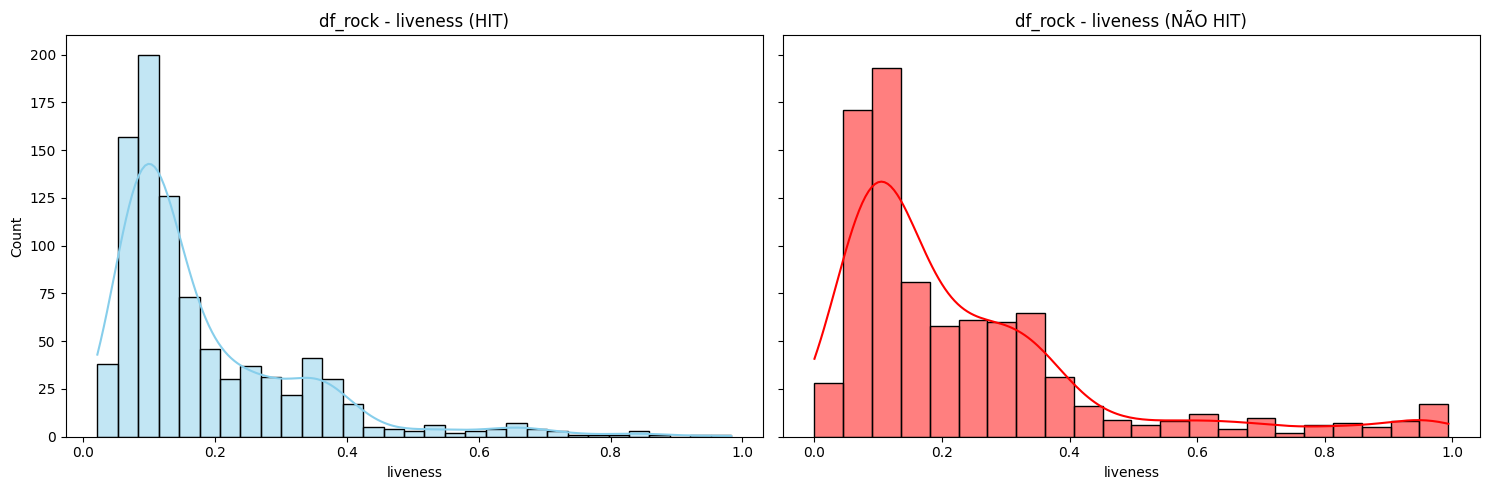

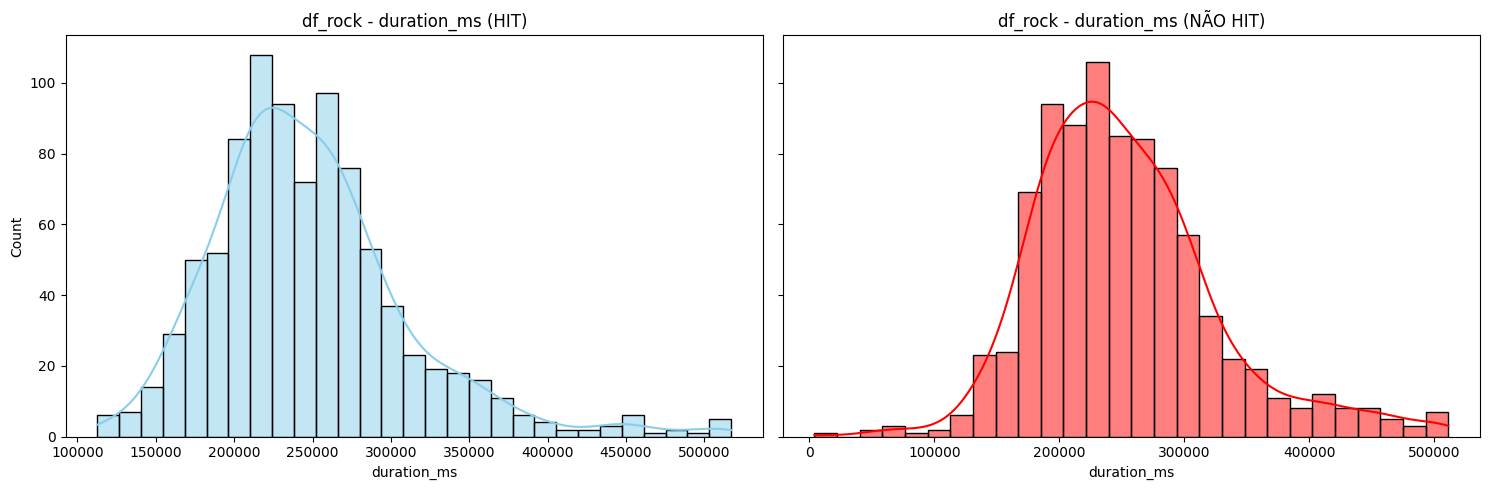

 Gênero: df_latin


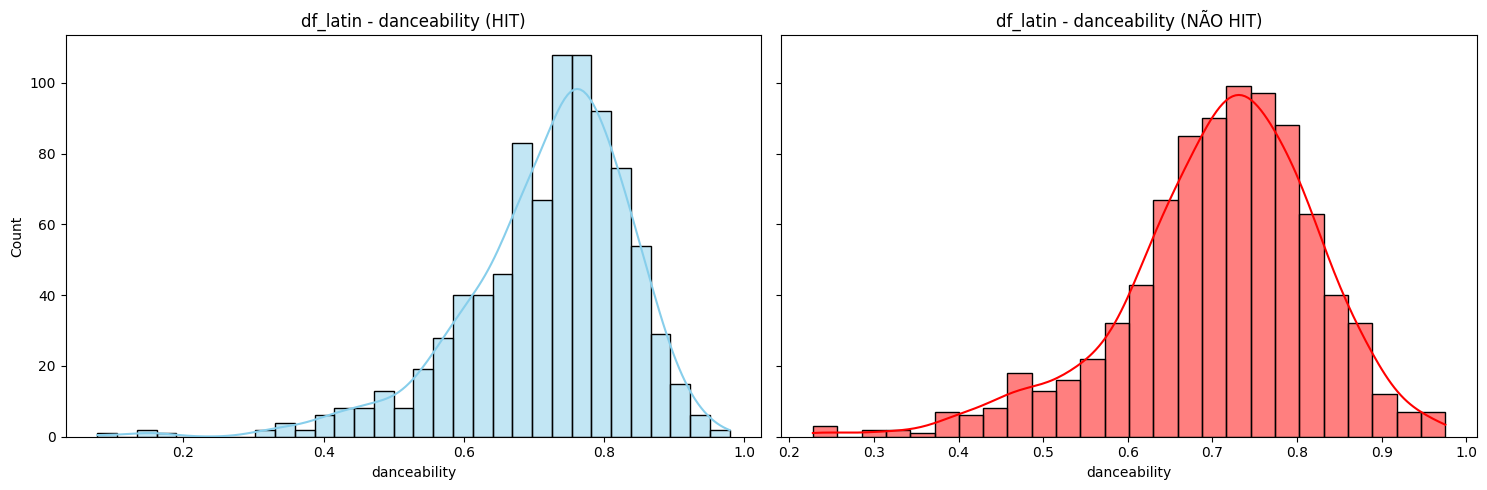

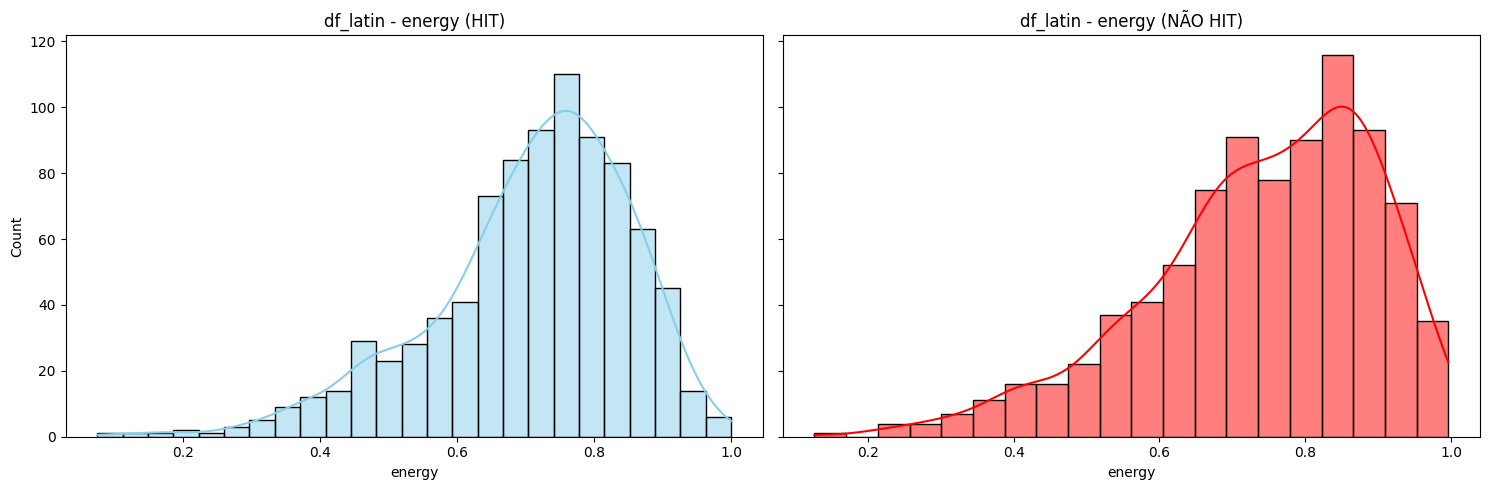

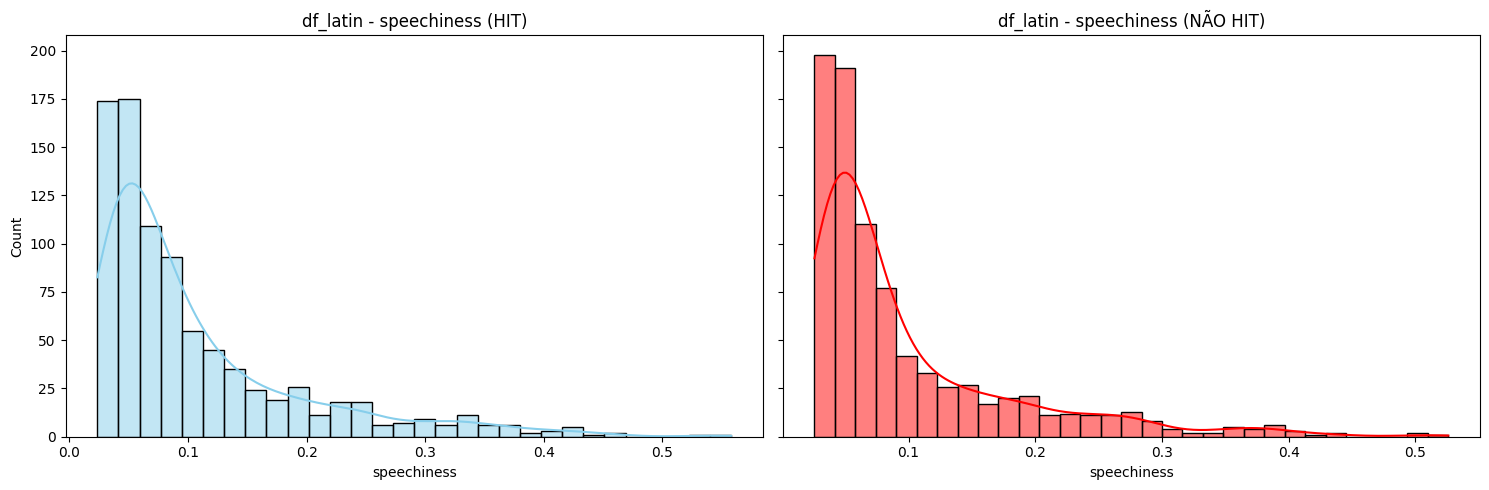

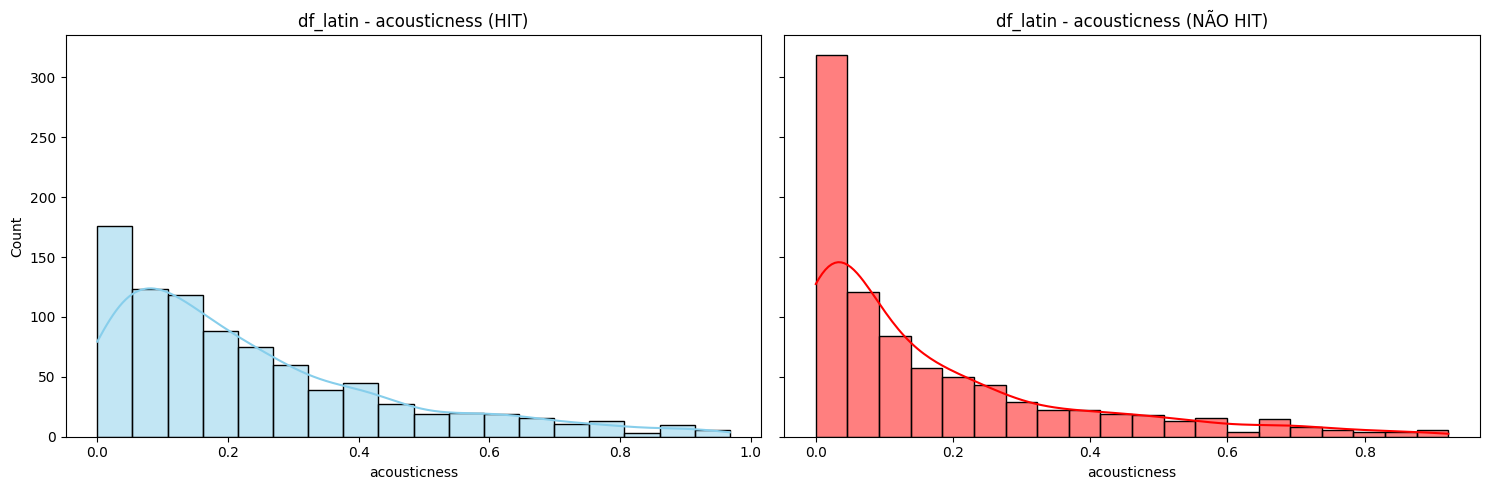

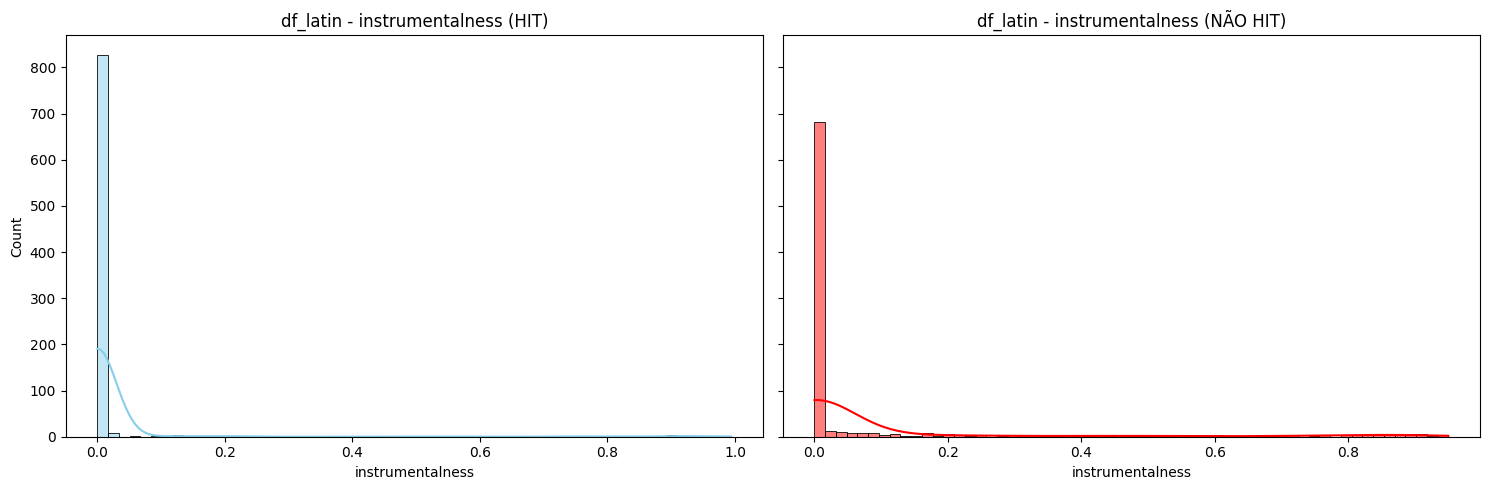

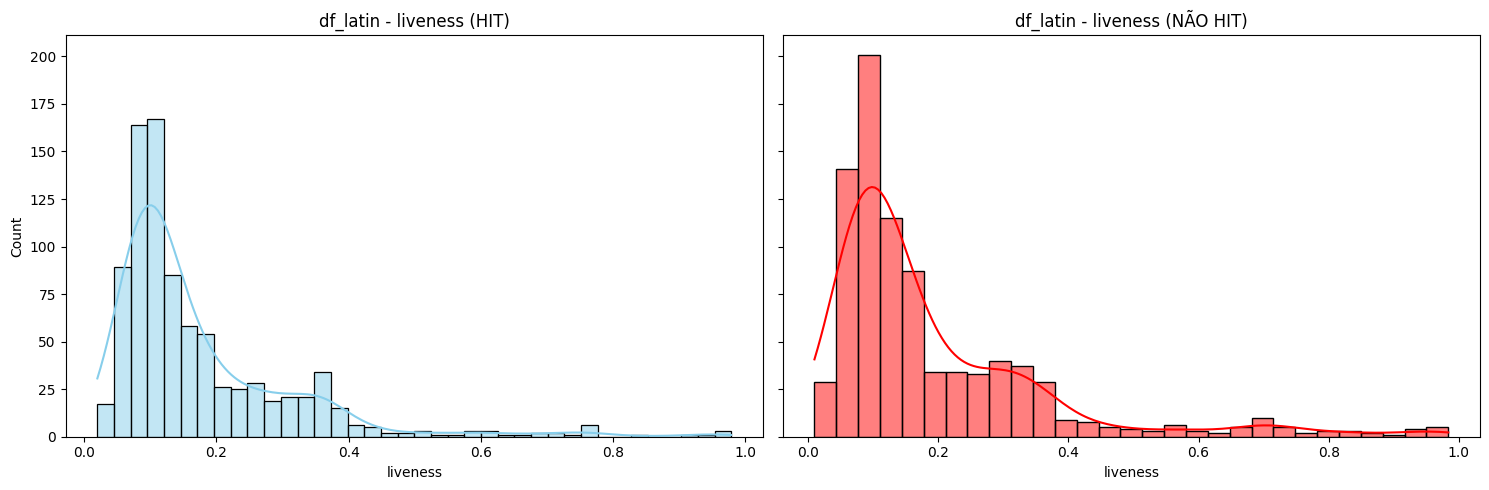

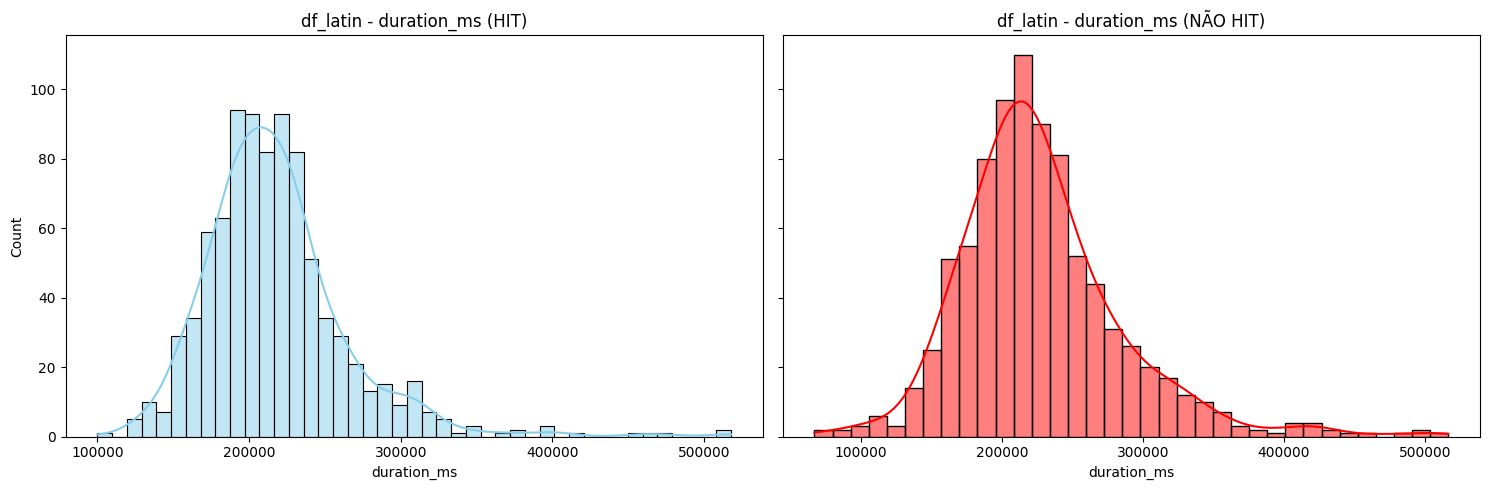

In [76]:
for dic in df_list:
    for key, value in dic.items():
        print(f" Gênero: {key}")
        df = value
        
        stats = df['track_popularity'].describe()
        df_hit_per = df[df.track_popularity >= stats['75%']]
        df_naohit_per = df[df.track_popularity <= stats['25%']]

        for variavel in variaveis_alvo:
            fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
            
            sns.histplot(df_hit_per[variavel], kde=True, color='skyblue', ax=axes[0])
            axes[0].set_title(f'{key} - {variavel} (HIT)')
    
            sns.histplot(df_naohit_per[variavel], kde=True, color='red', ax=axes[1])
            axes[1].set_title(f'{key} - {variavel} (NÃO HIT)')
            
            plt.tight_layout()
            plt.show()